# LSTM Model Developement

### Comparing with three different interval timeframe 
Here to get the three different timeframes (5,15,30) minutes interval data and make compare about the nature of data by doing Exploratory Data Analysis (EDA) to ensure better result and choose the best one among three

### Exploratory Data Analysis 

#### EDA for **5 minutes** interval timeframe

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (10000, 8)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
open,float64,0.000000,NA,58854.320000,71905.550000,Column has 113 outliers greater than upper bound (74411.85) or lower than lower bound(60454.55). Cap them or remove them.
high,float64,0.000000,NA,59145.470000,71933.660000,"Column has 109 outliers greater than upper bound (74460.18) or lower than lower bound(60491.11). Cap them or remove them., Column has a high correlation with ['open']. Consider dropping one of them."
low,float64,0.000000,NA,58384.530000,71833.510000,"Column has 113 outliers greater than upper bound (74368.61) or lower than lower bound(60380.36). Cap them or remove them., Column has a high correlation with ['open', 'high']. Consider dropping one of them."
tick_volume,int64,0.000000,16,3.000000,1962.000000,Column has 33 outliers greater than upper bound (1814.12) or lower than lower bound(-302.88). Cap them or remove them.
spread,int64,0.000000,19,0.000000,5373.000000,Column has 319 outliers greater than upper bound (2315.50) or lower than lower bound(-128.50). Cap them or remove them.
close,float64,0.000000,98,58849.240000,71905.200000,Target column


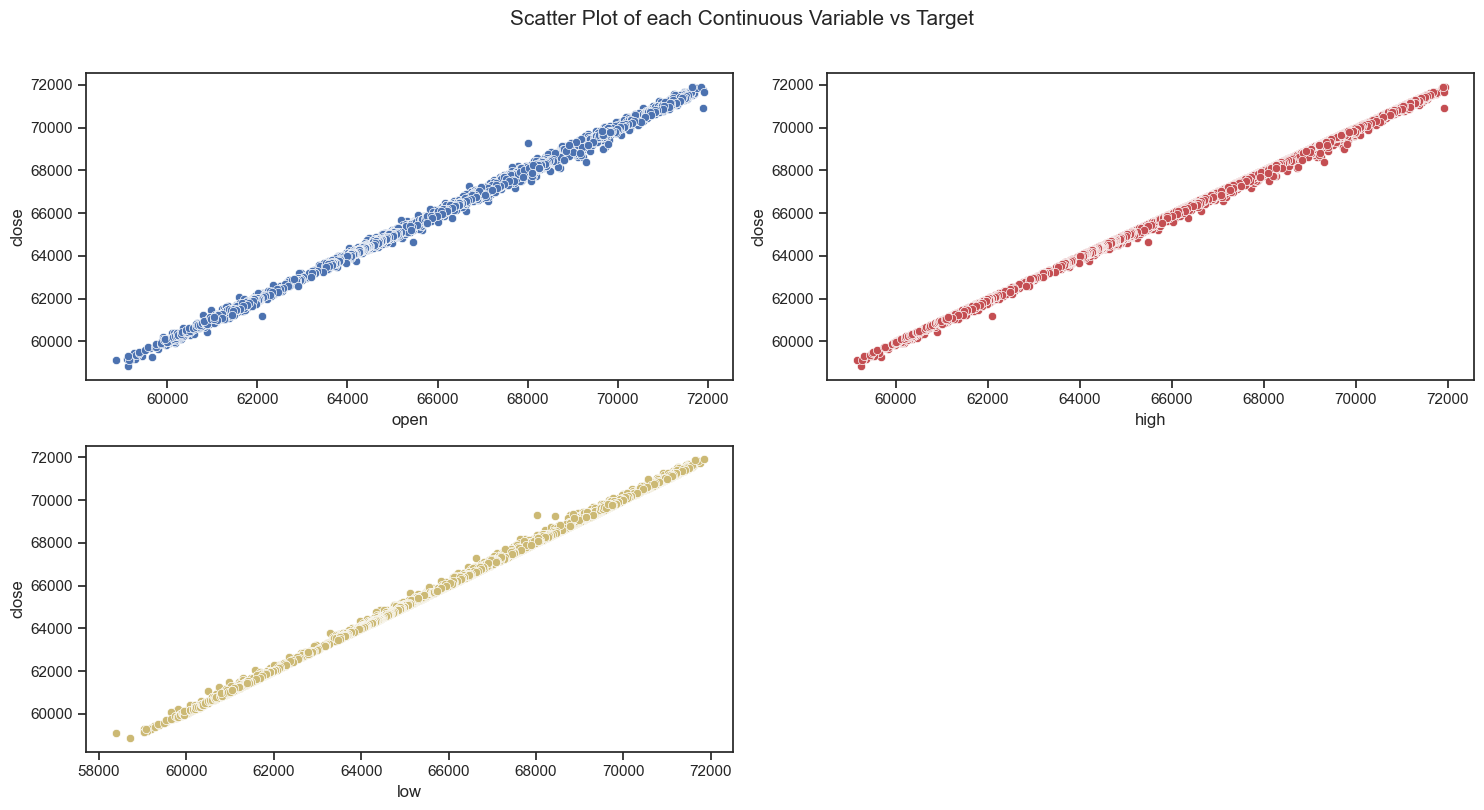

Number of All Scatter Plots = 6


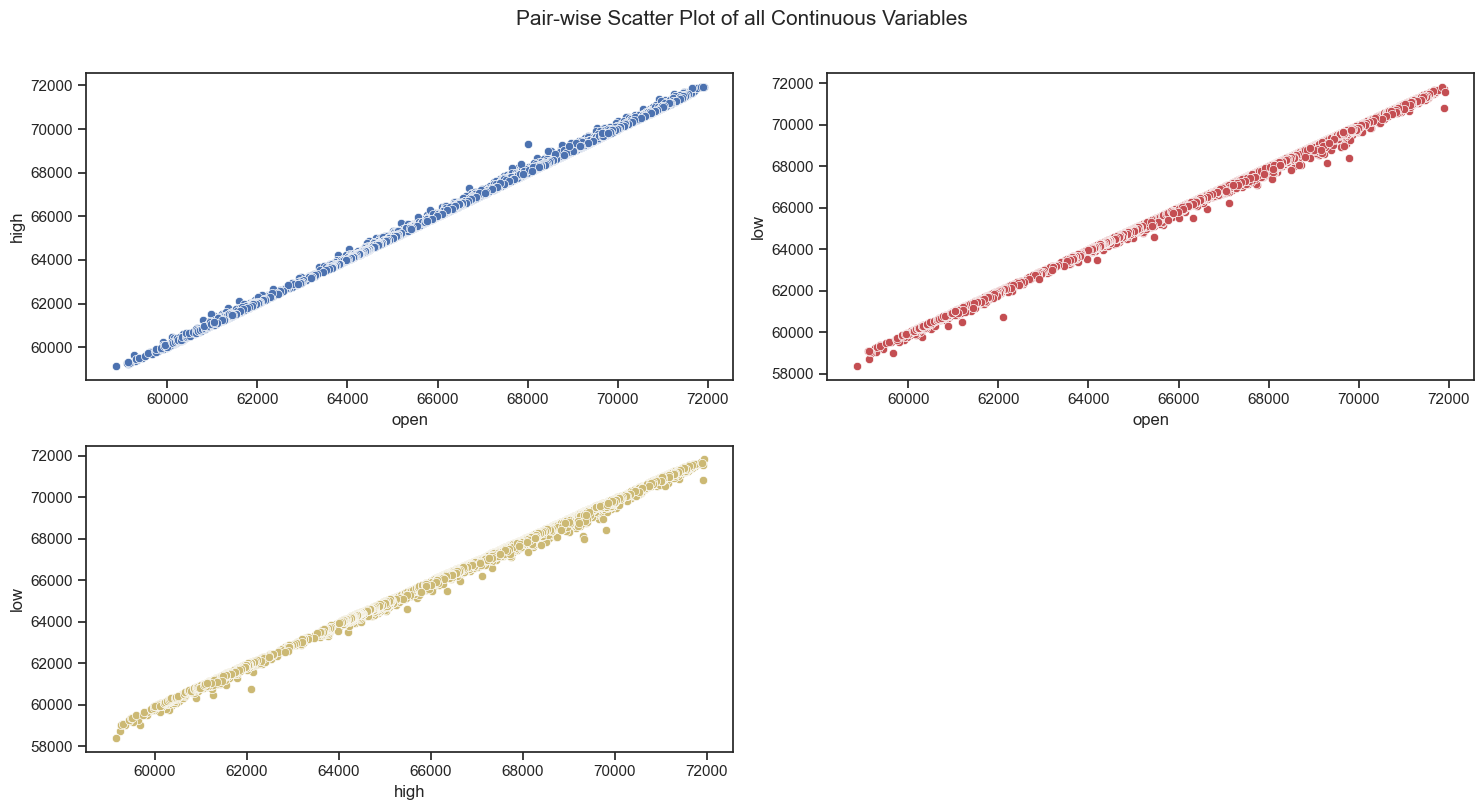

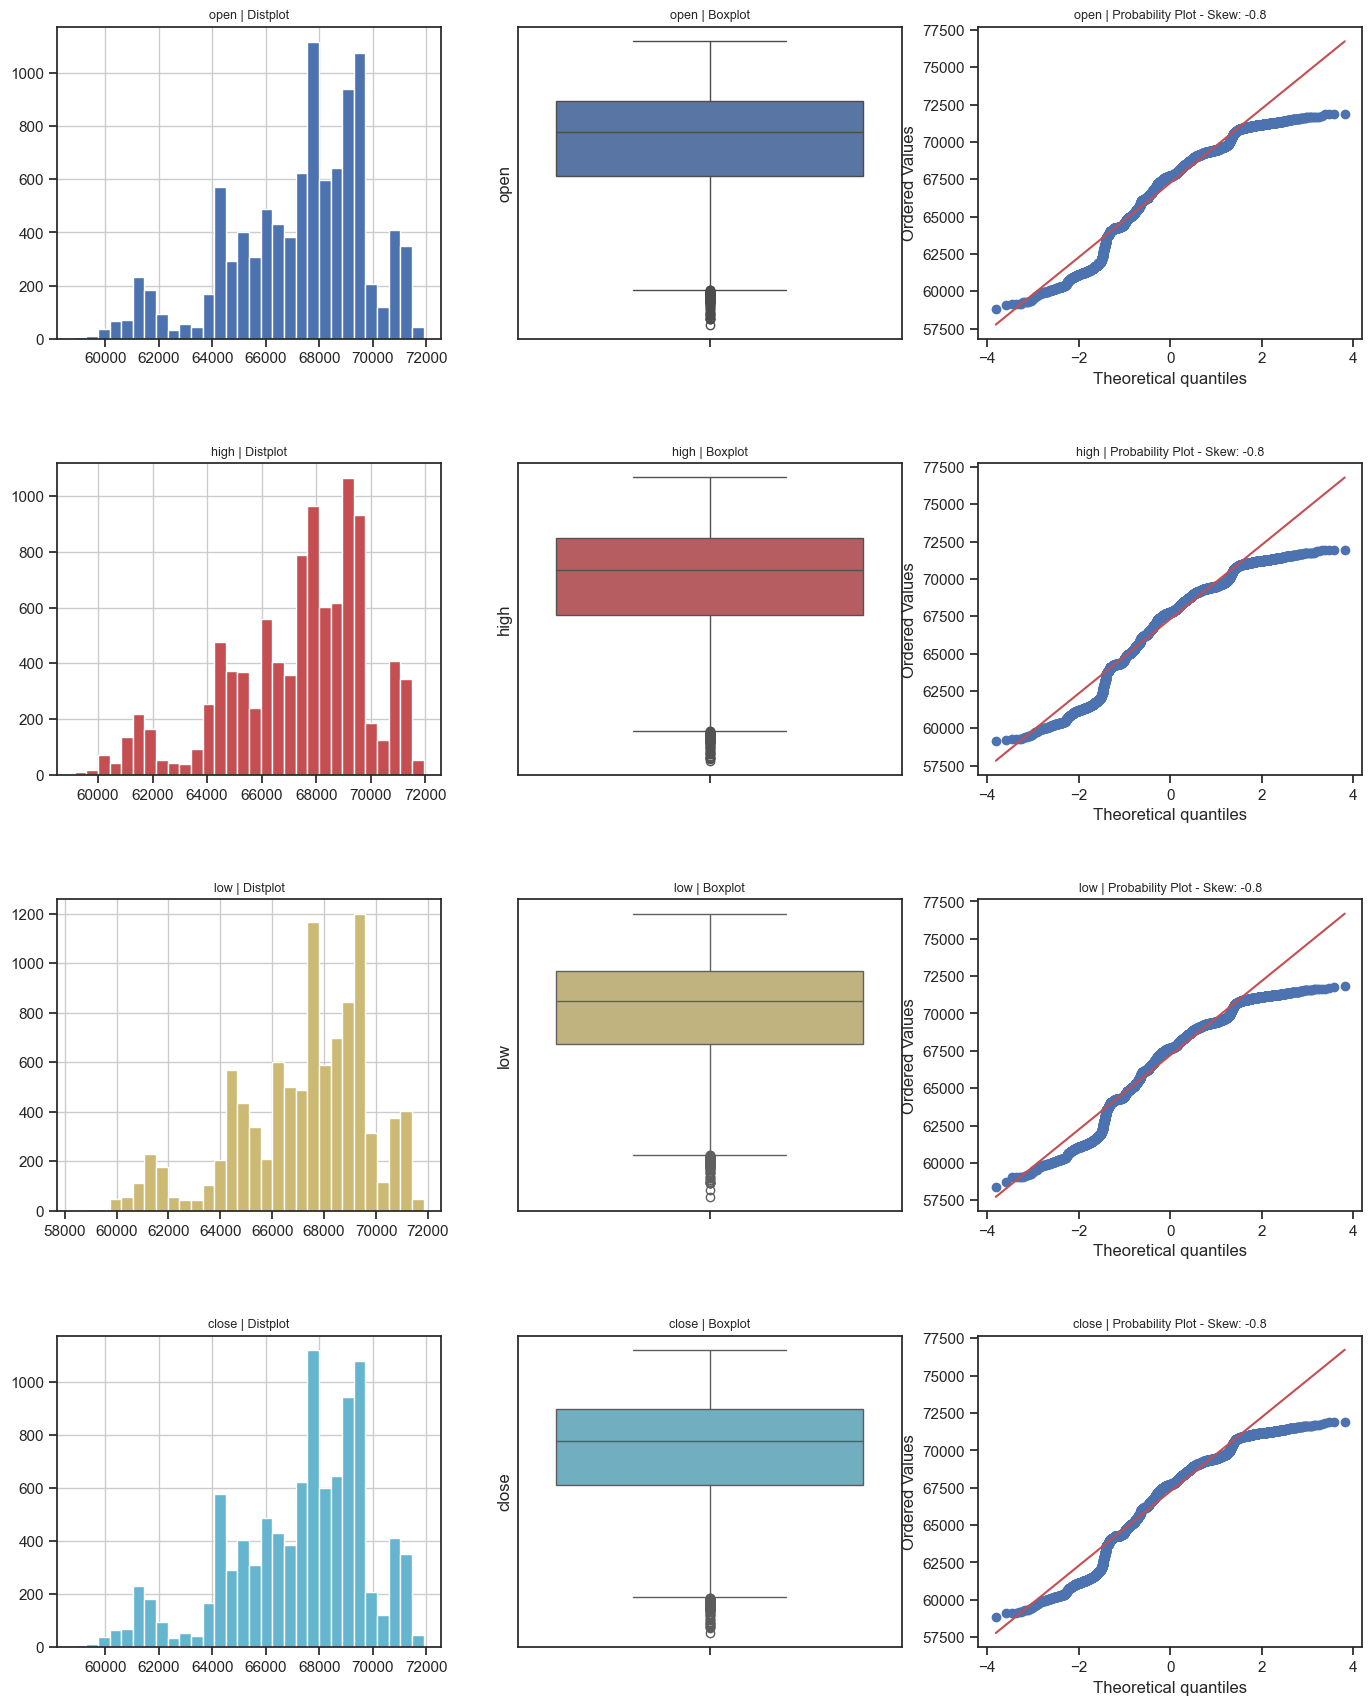

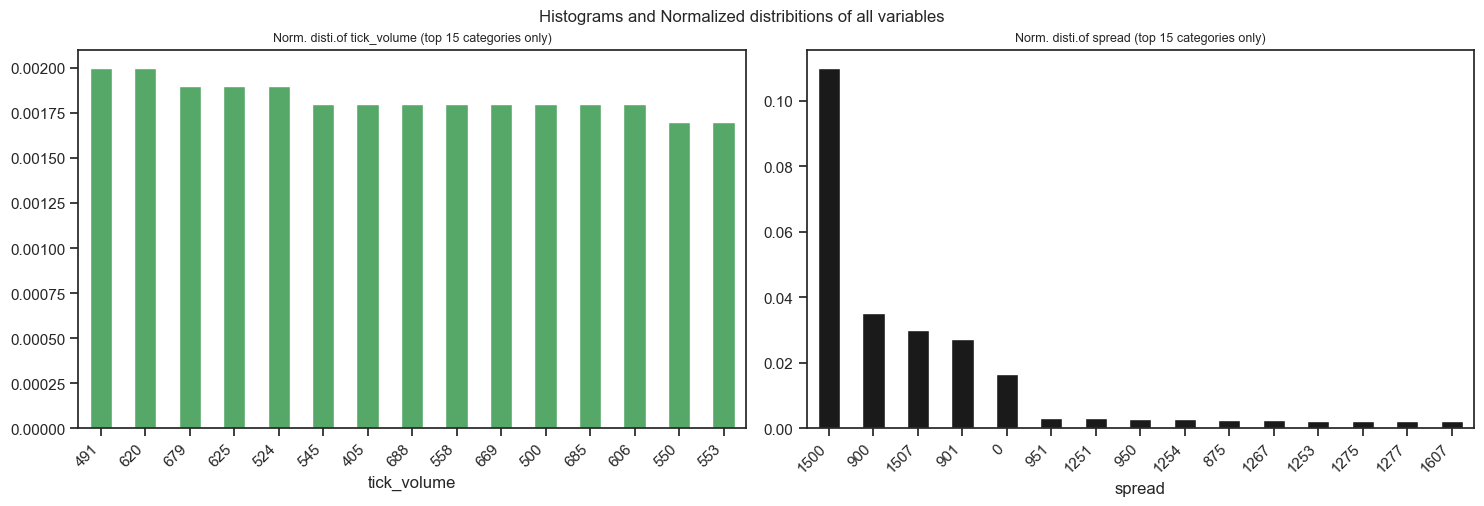

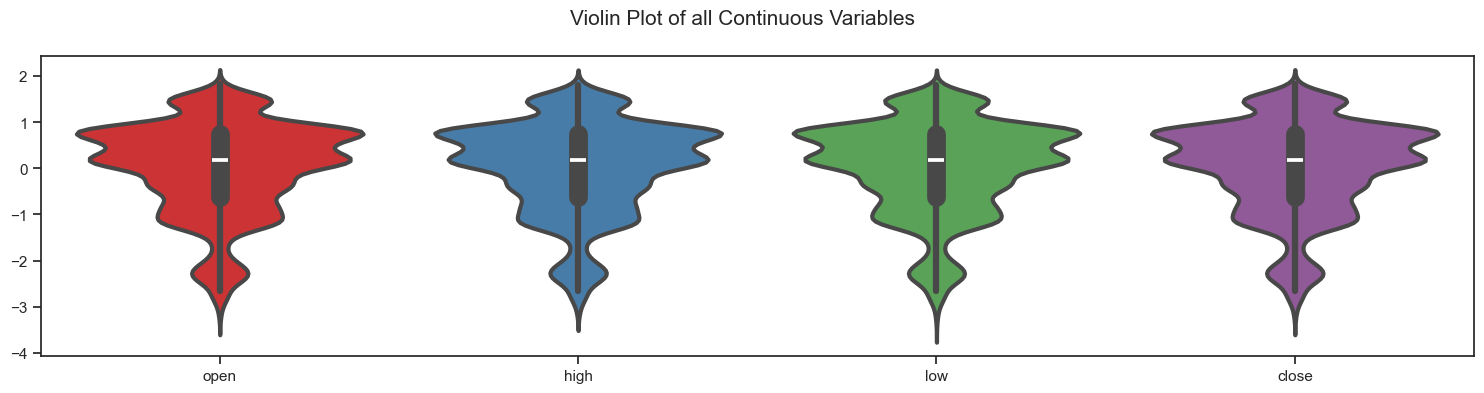

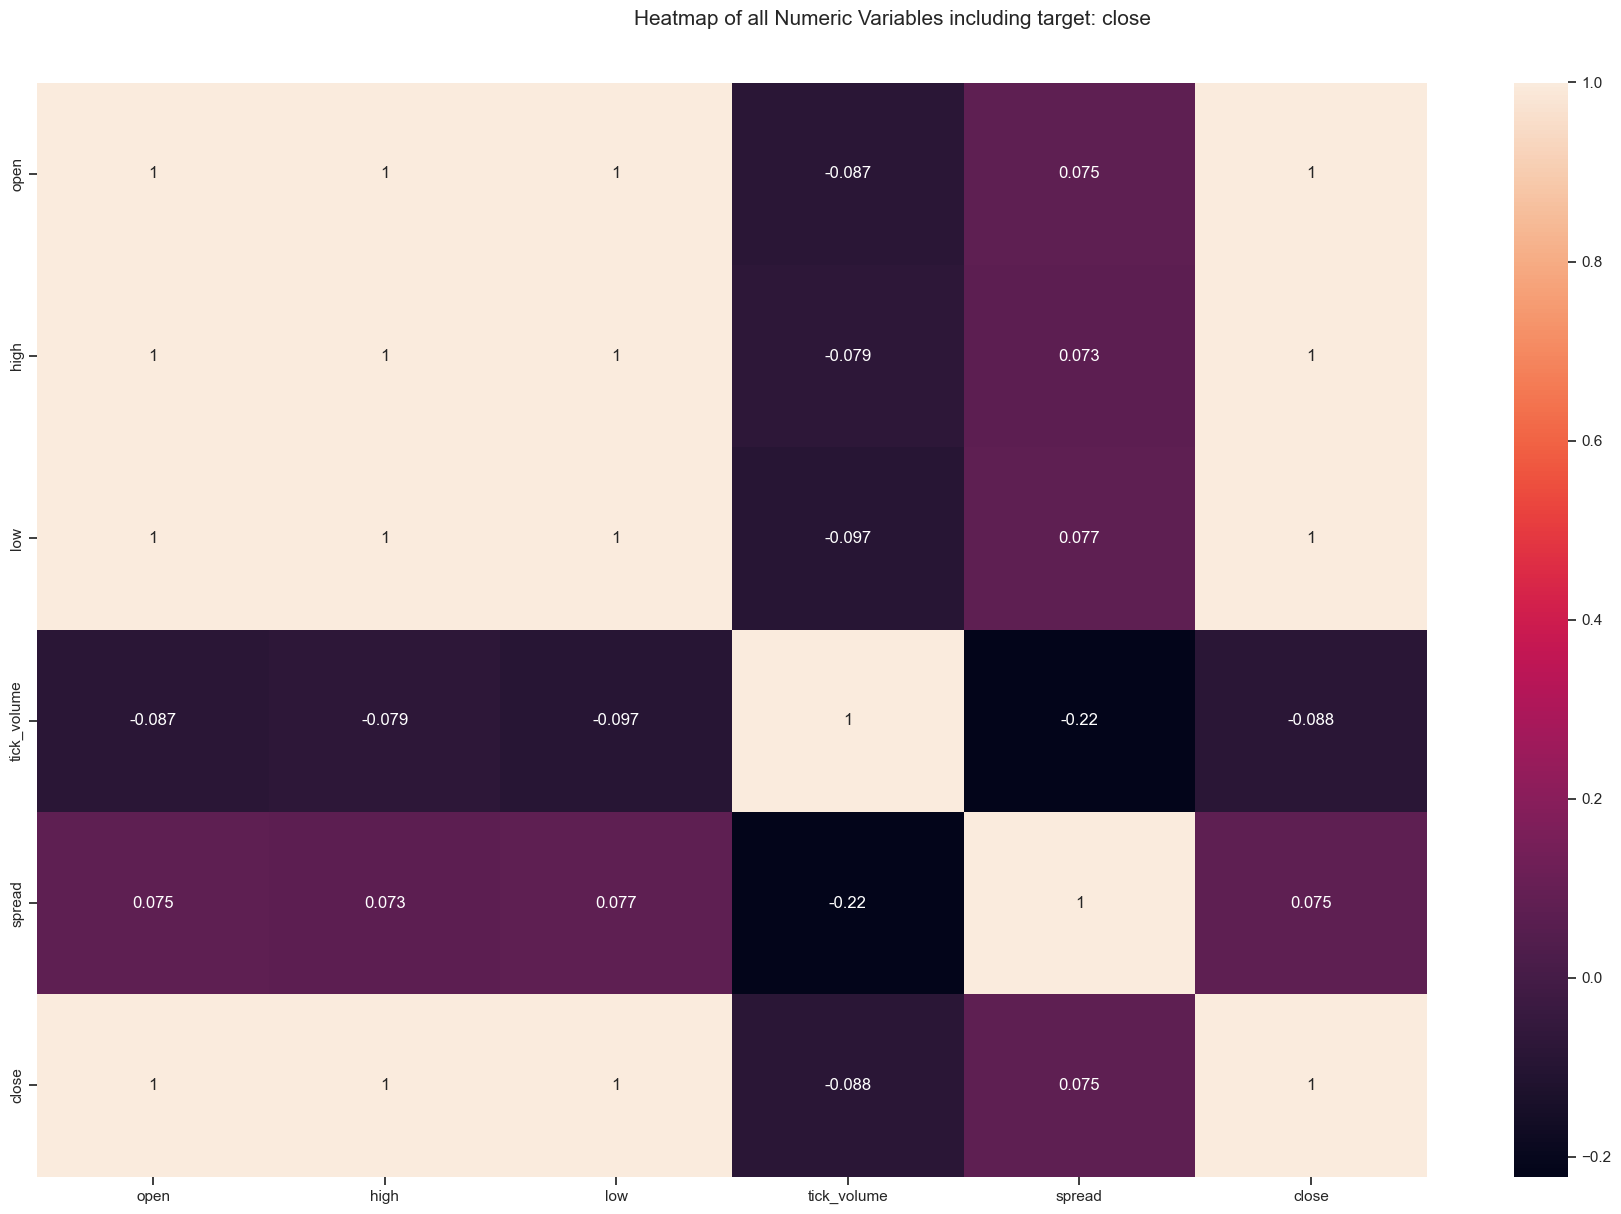

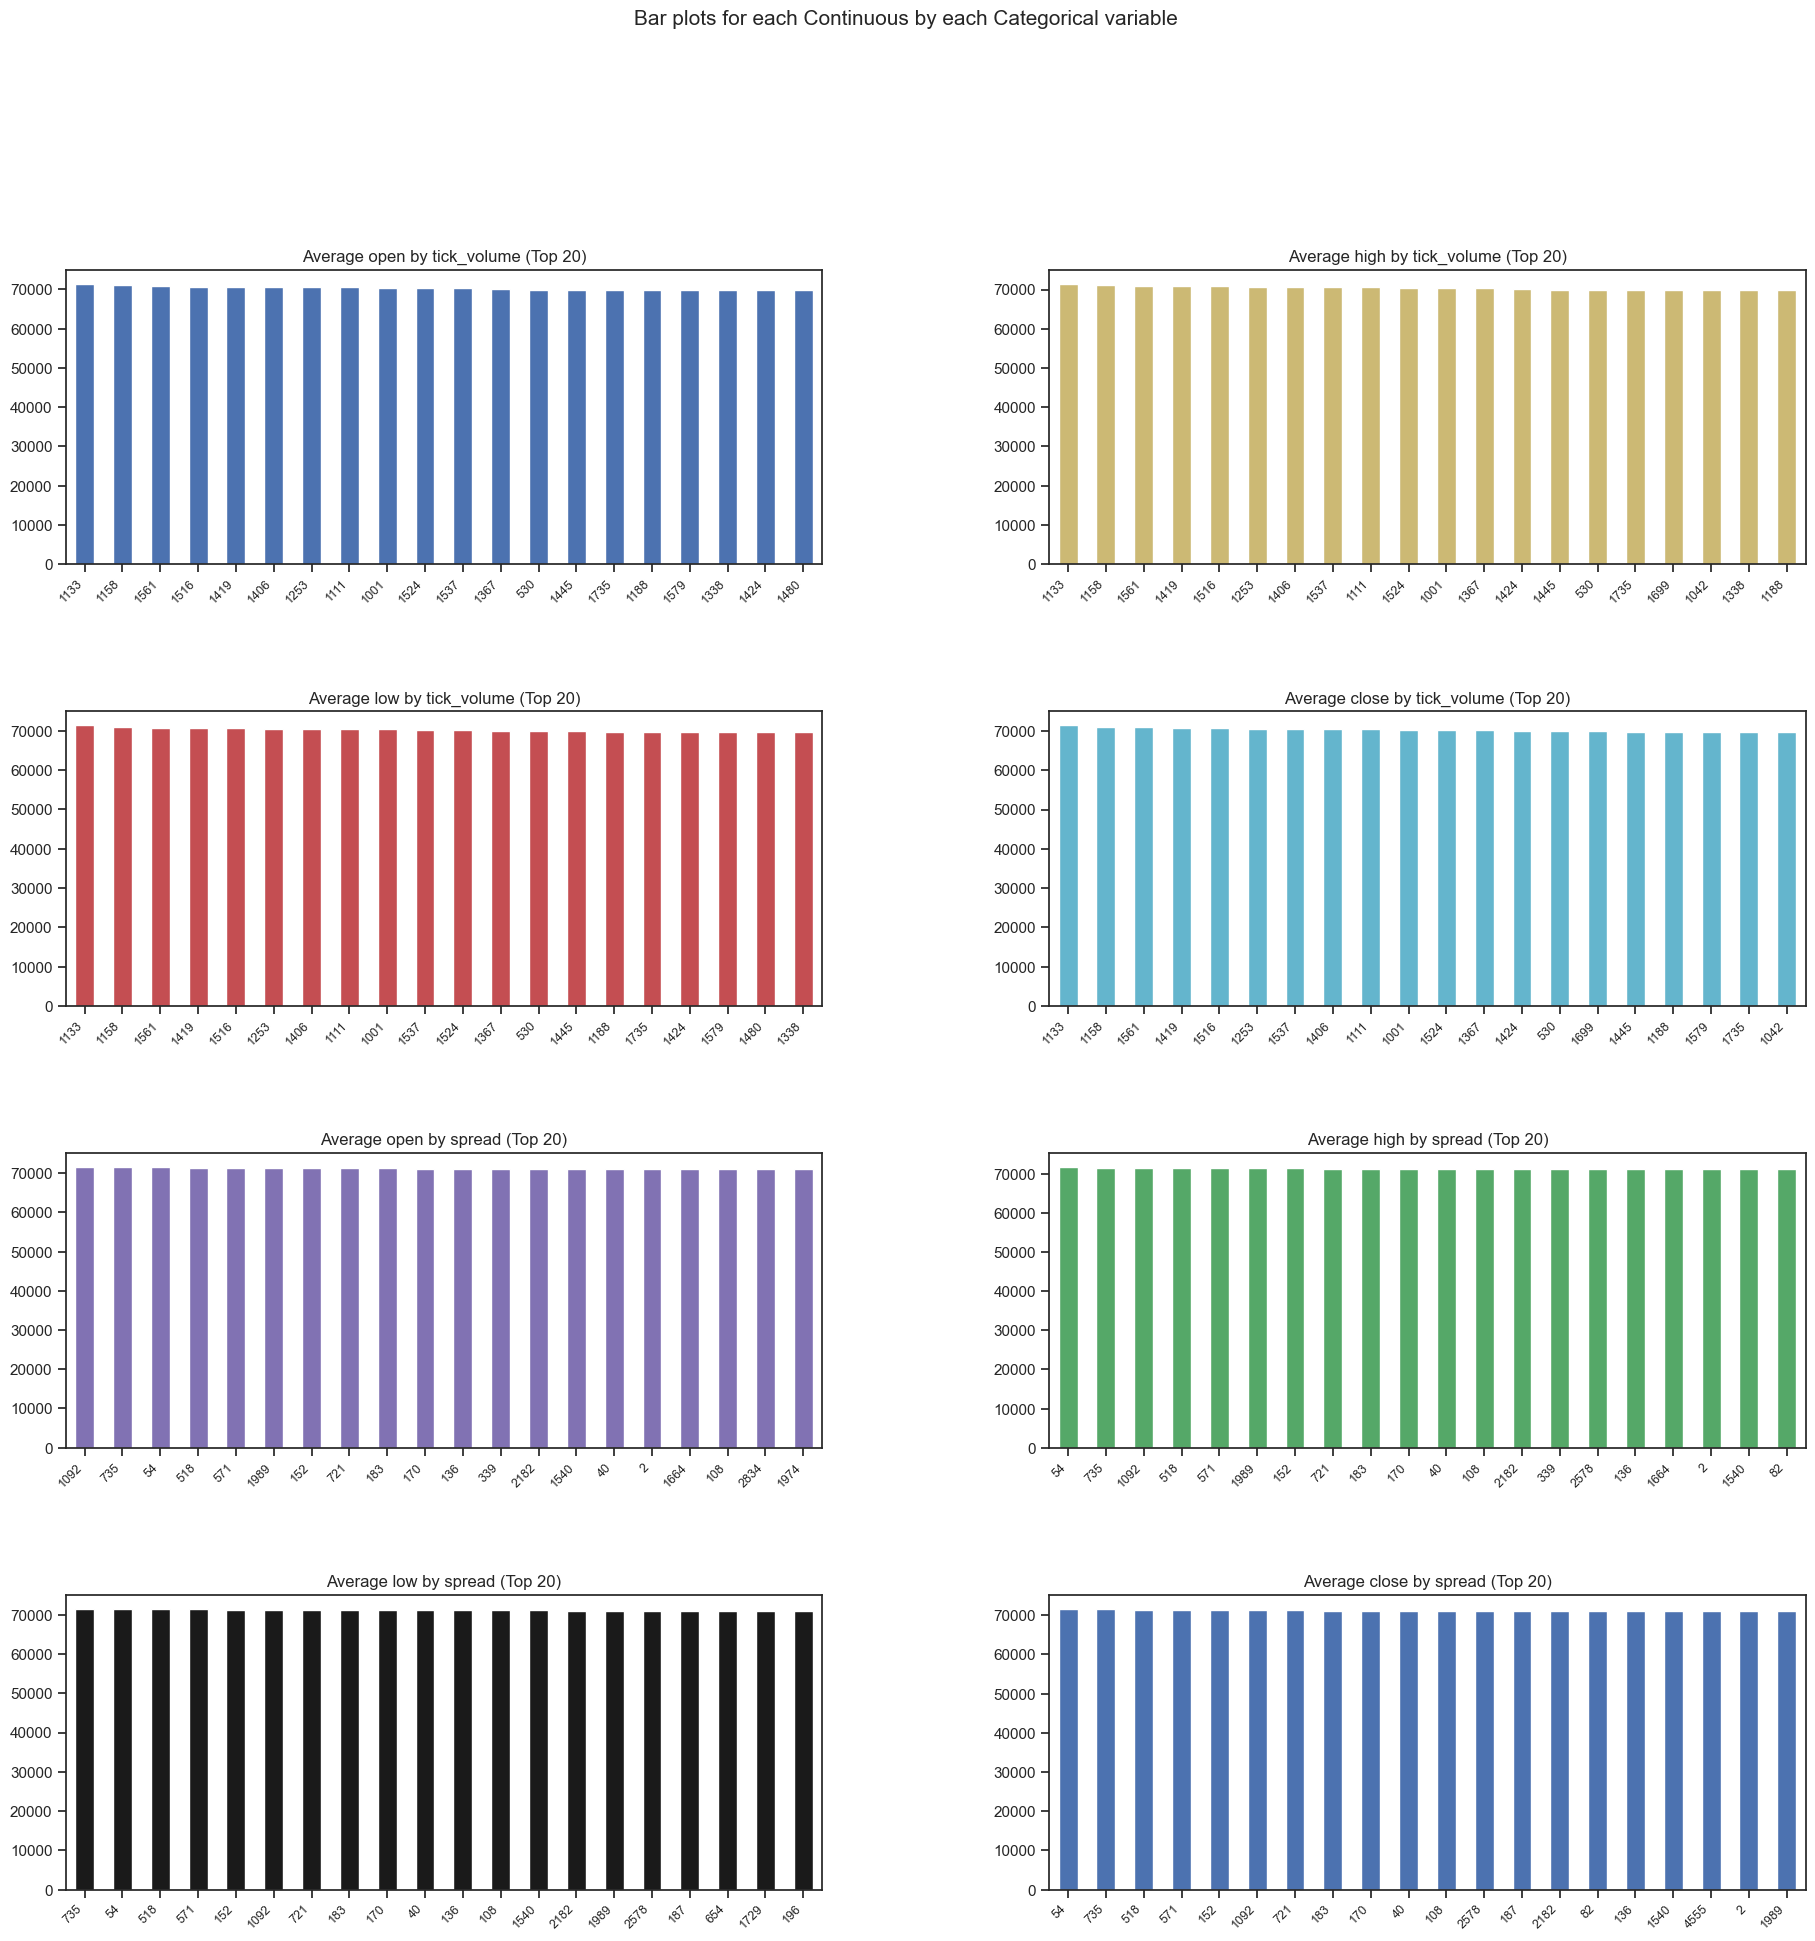

All Plots done
Time to run AutoViz = 11 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [1]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()

dft = AV.AutoViz(
    'data_5.csv',
    sep=",",
    depVar="close",
    dfte=None,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="jpg",
    save_plot_dir=None
)

#### EDA for **15 minutes** interval timeframe

Shape of your Data Set loaded: (10000, 8)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  1
    7 Predictors classified...
        2 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['time', 'real_volume']

################ Regression problem ########

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
open,float64,0.000000,NA,56687.160000,73636.900000,No issue
high,float64,0.000000,NA,56918.000000,73843.750000,Column has a high correlation with ['open']. Consider dropping one of them.
low,float64,0.000000,NA,56448.280000,73412.790000,"Column has a high correlation with ['open', 'high']. Consider dropping one of them."
tick_volume,int64,0.000000,43,3.000000,6576.000000,No issue
spread,int64,0.000000,18,0.000000,24750.000000,Column has 109 outliers greater than upper bound (2514.38) or lower than lower bound(-566.62). Cap them or remove them.
close,float64,0.000000,99,56689.660000,73639.900000,Target column


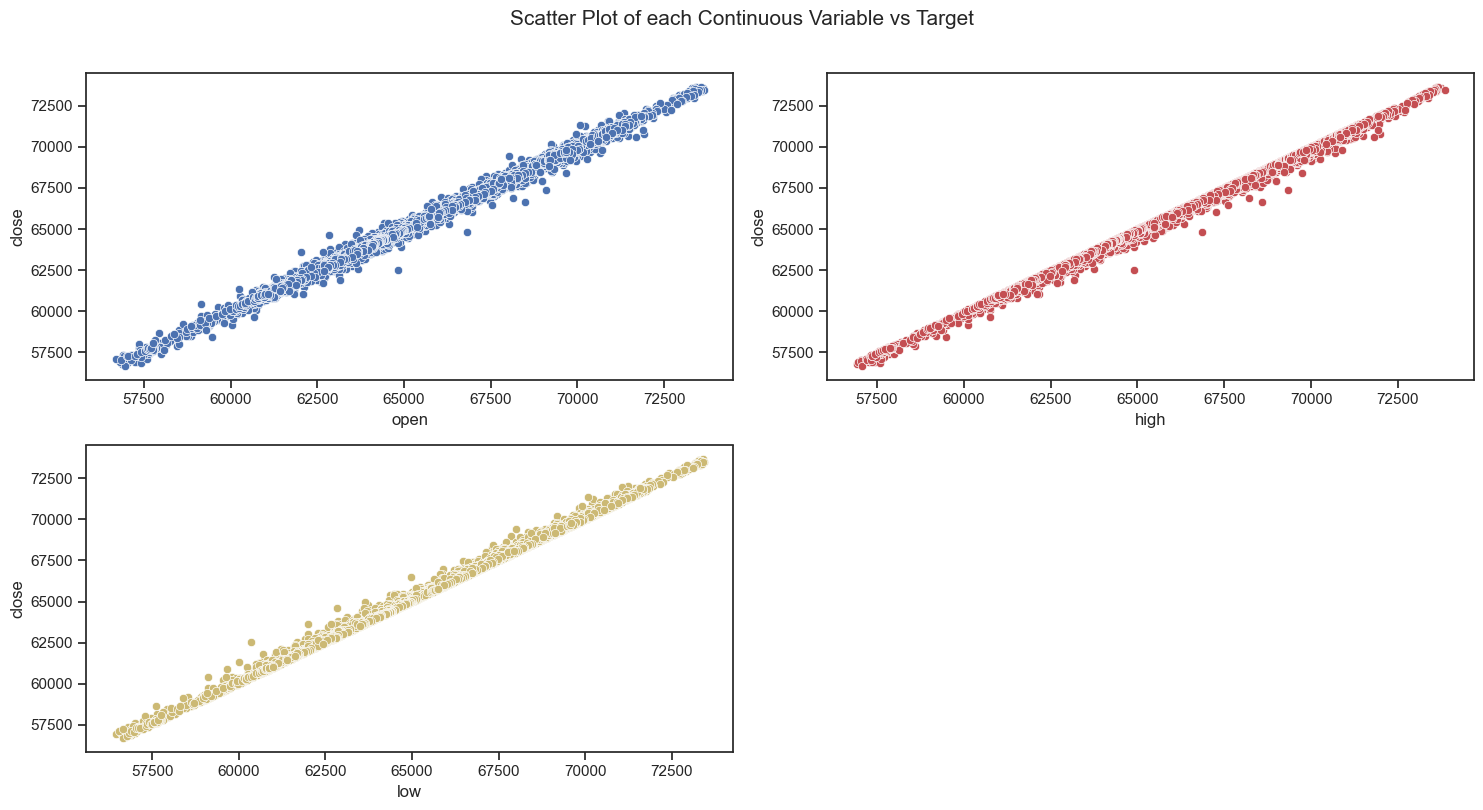

Number of All Scatter Plots = 6


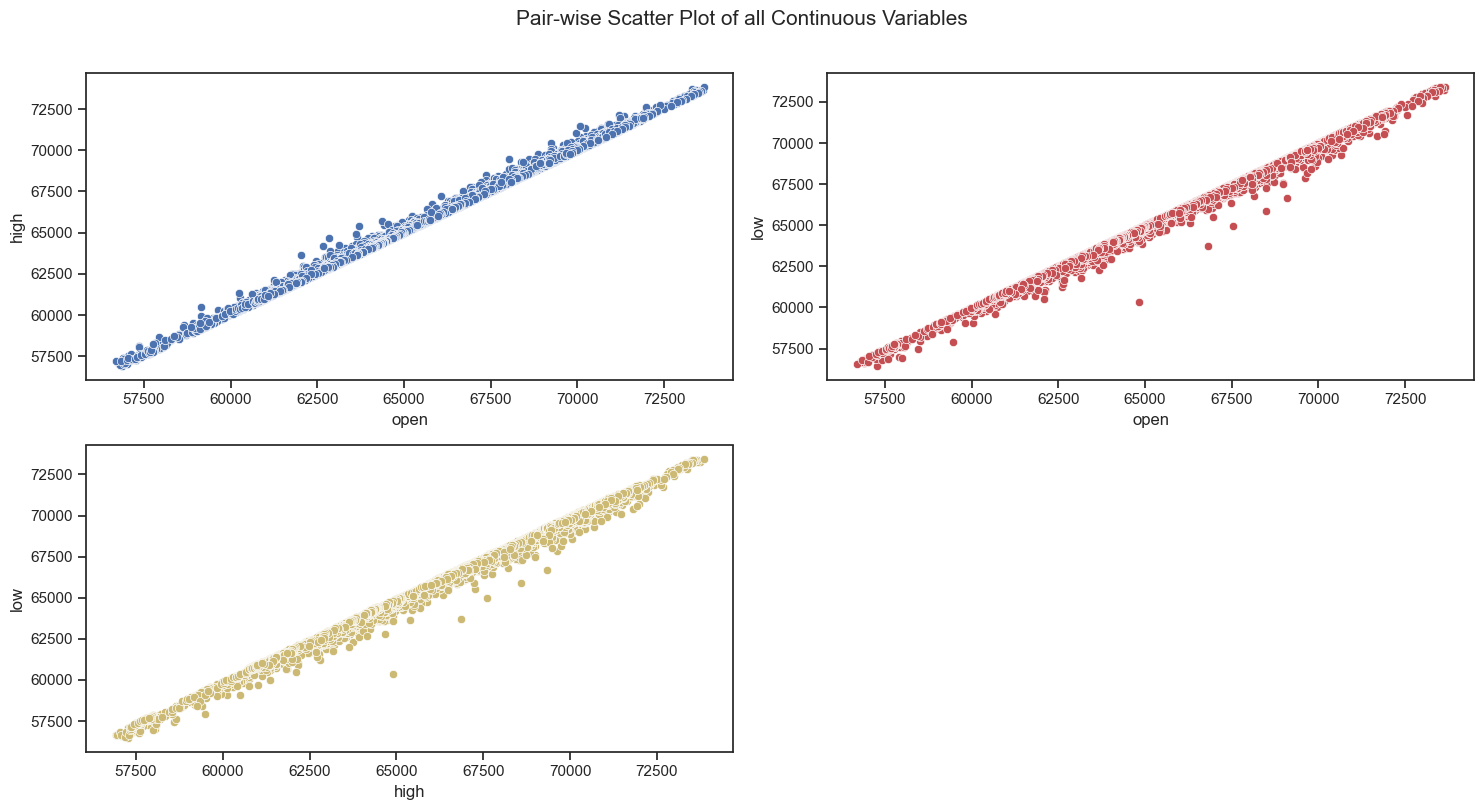

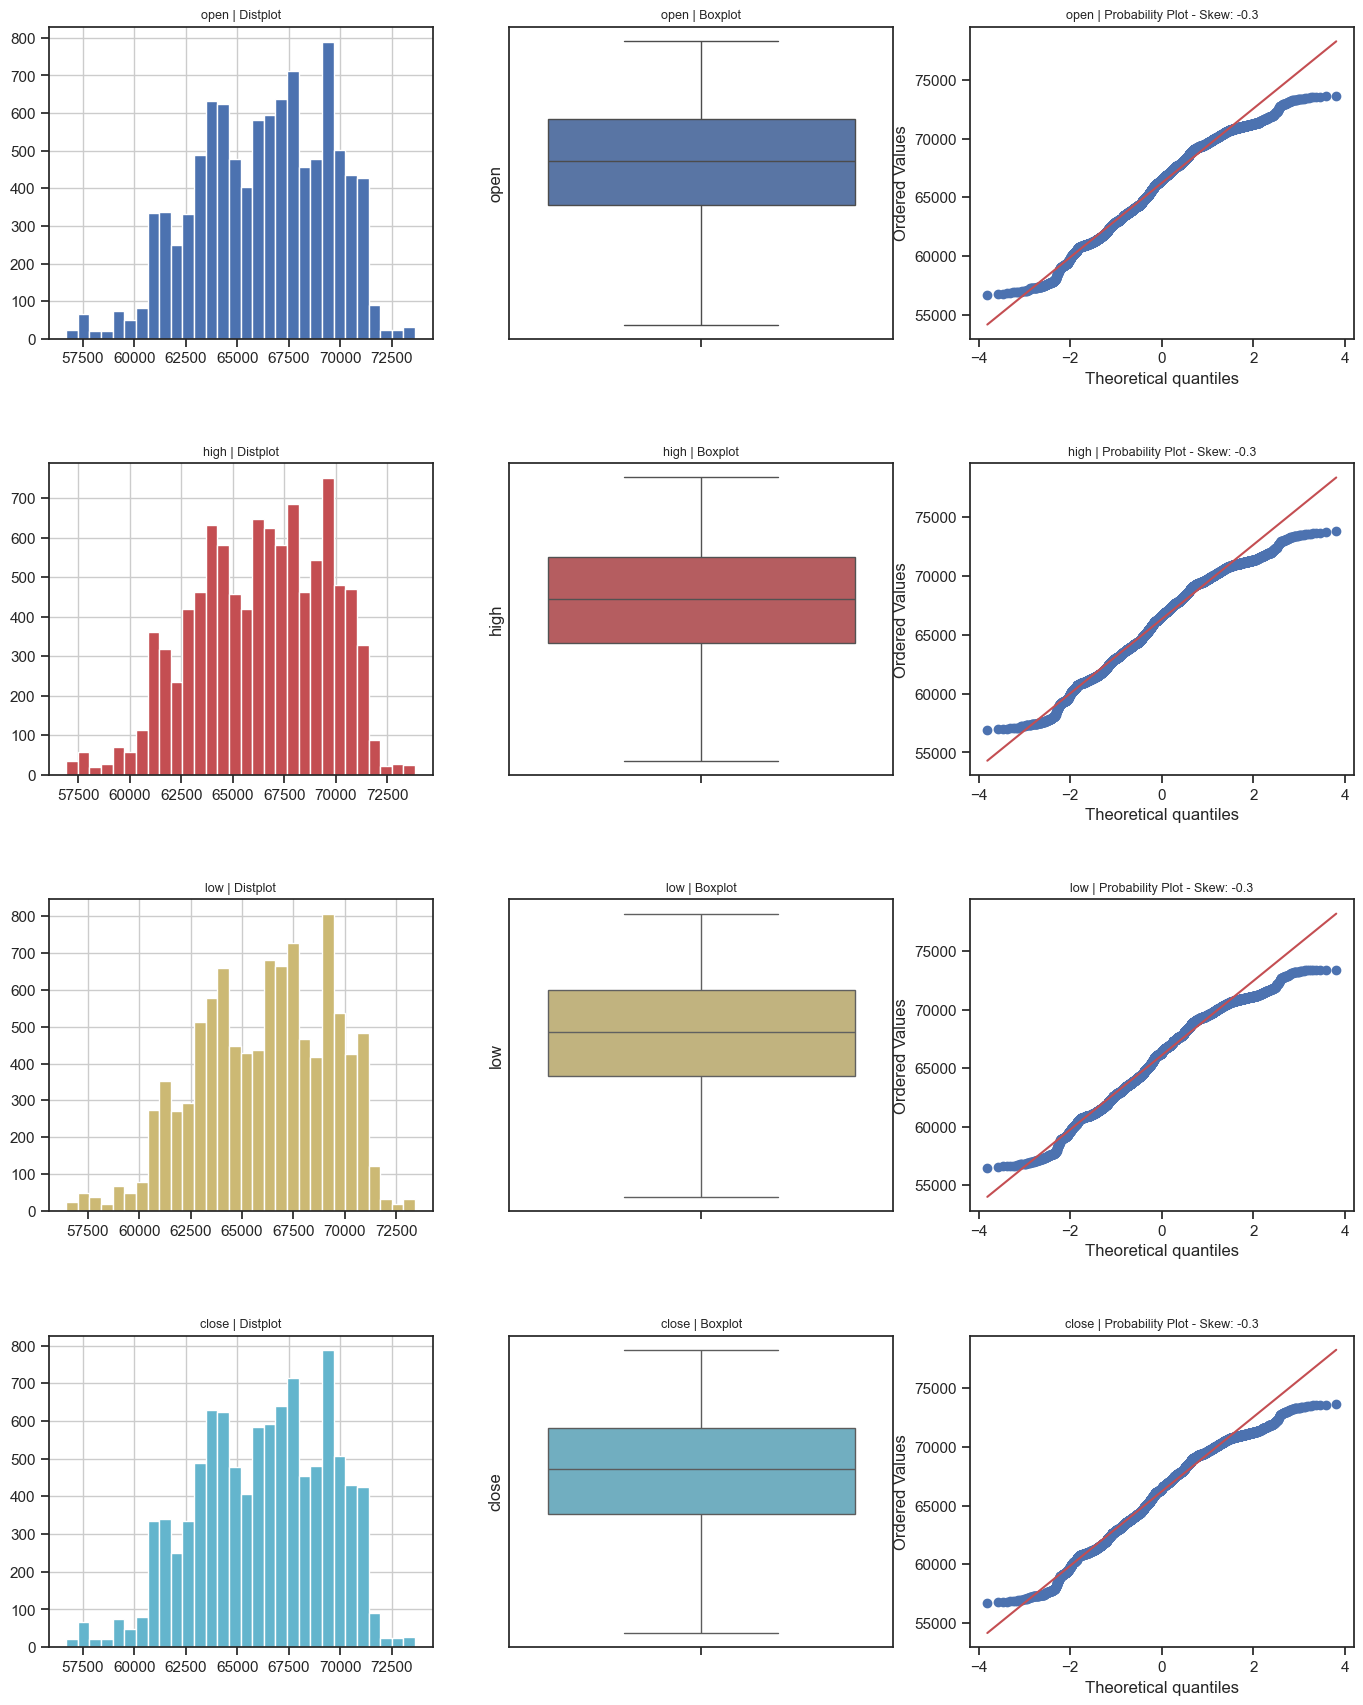

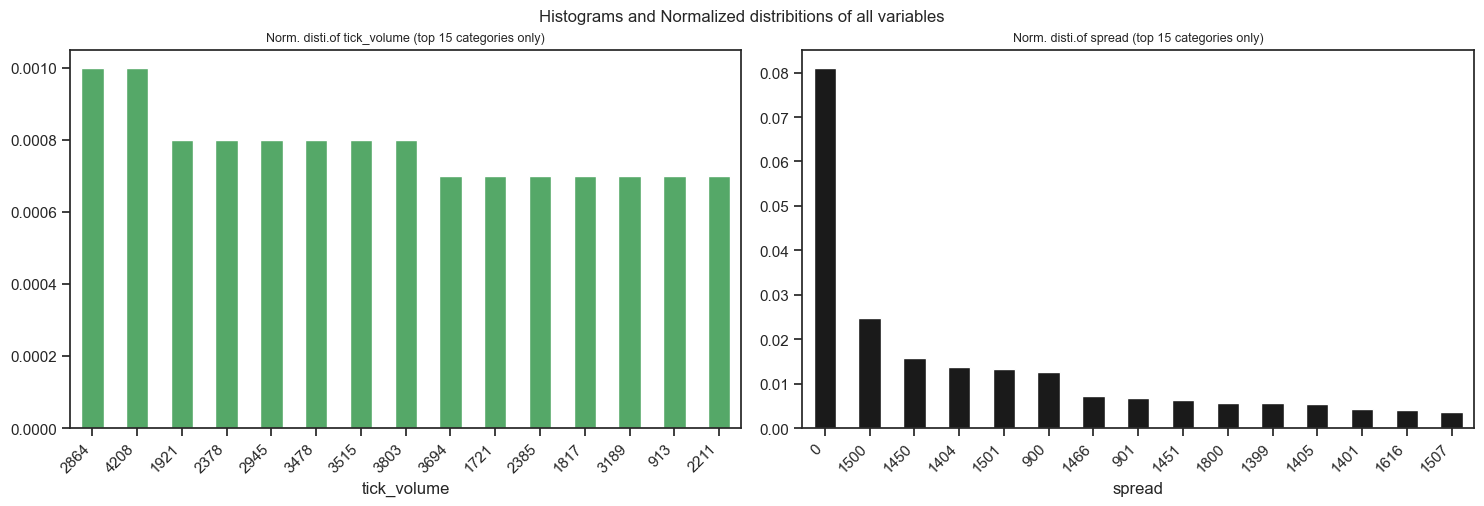

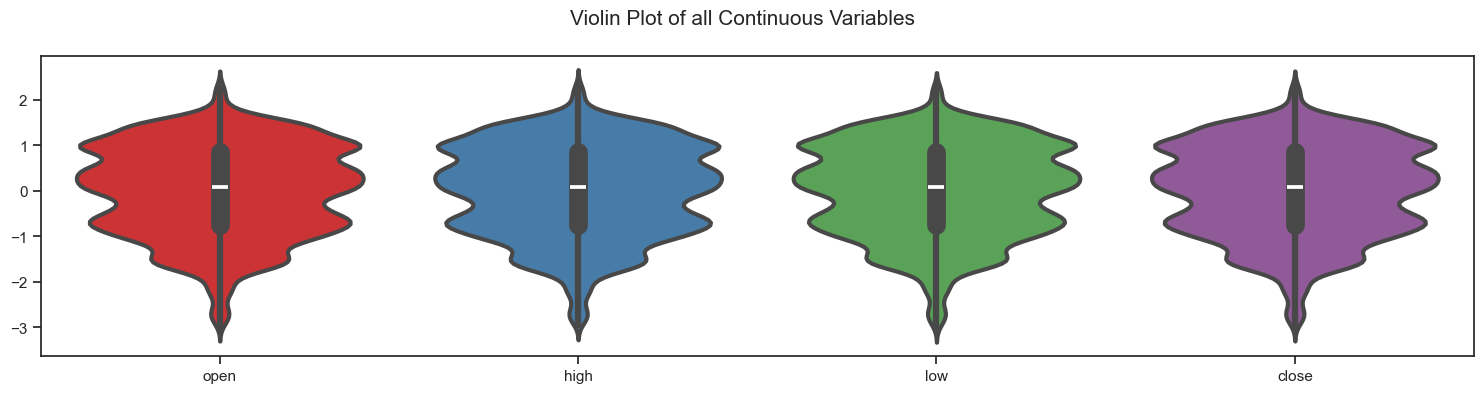

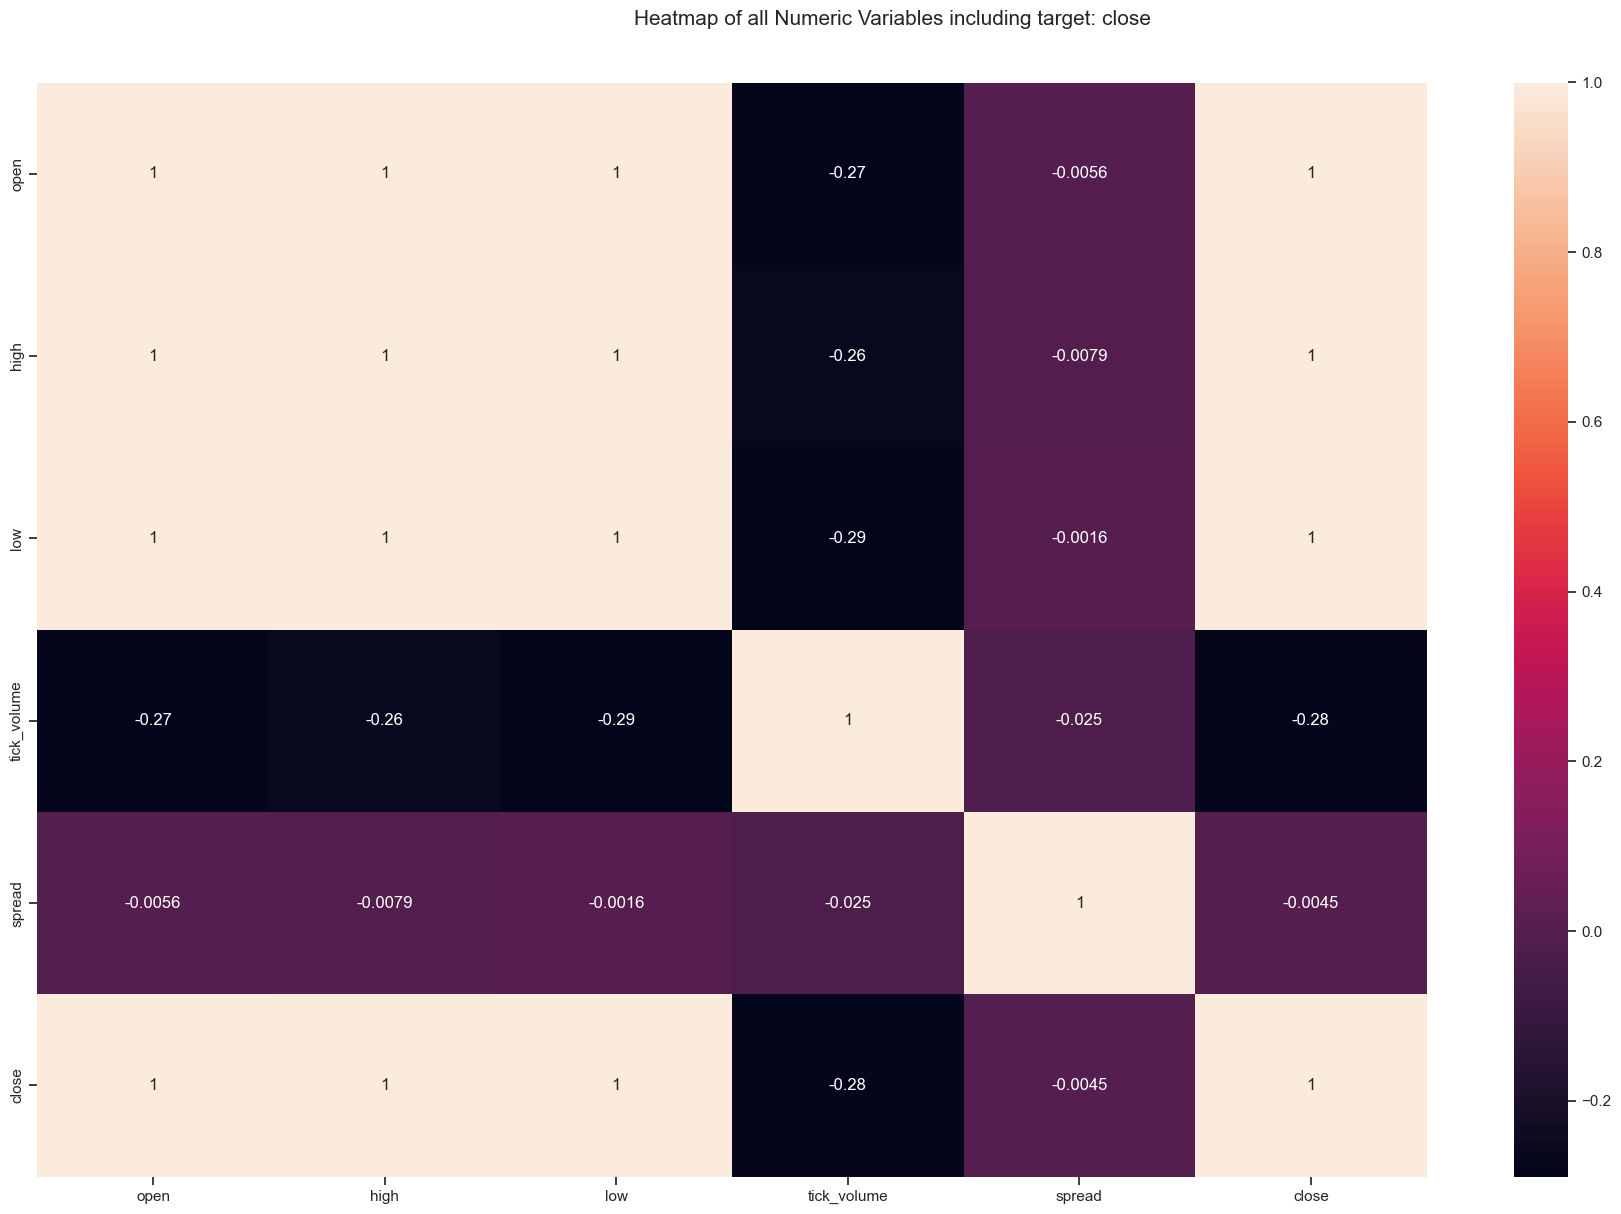

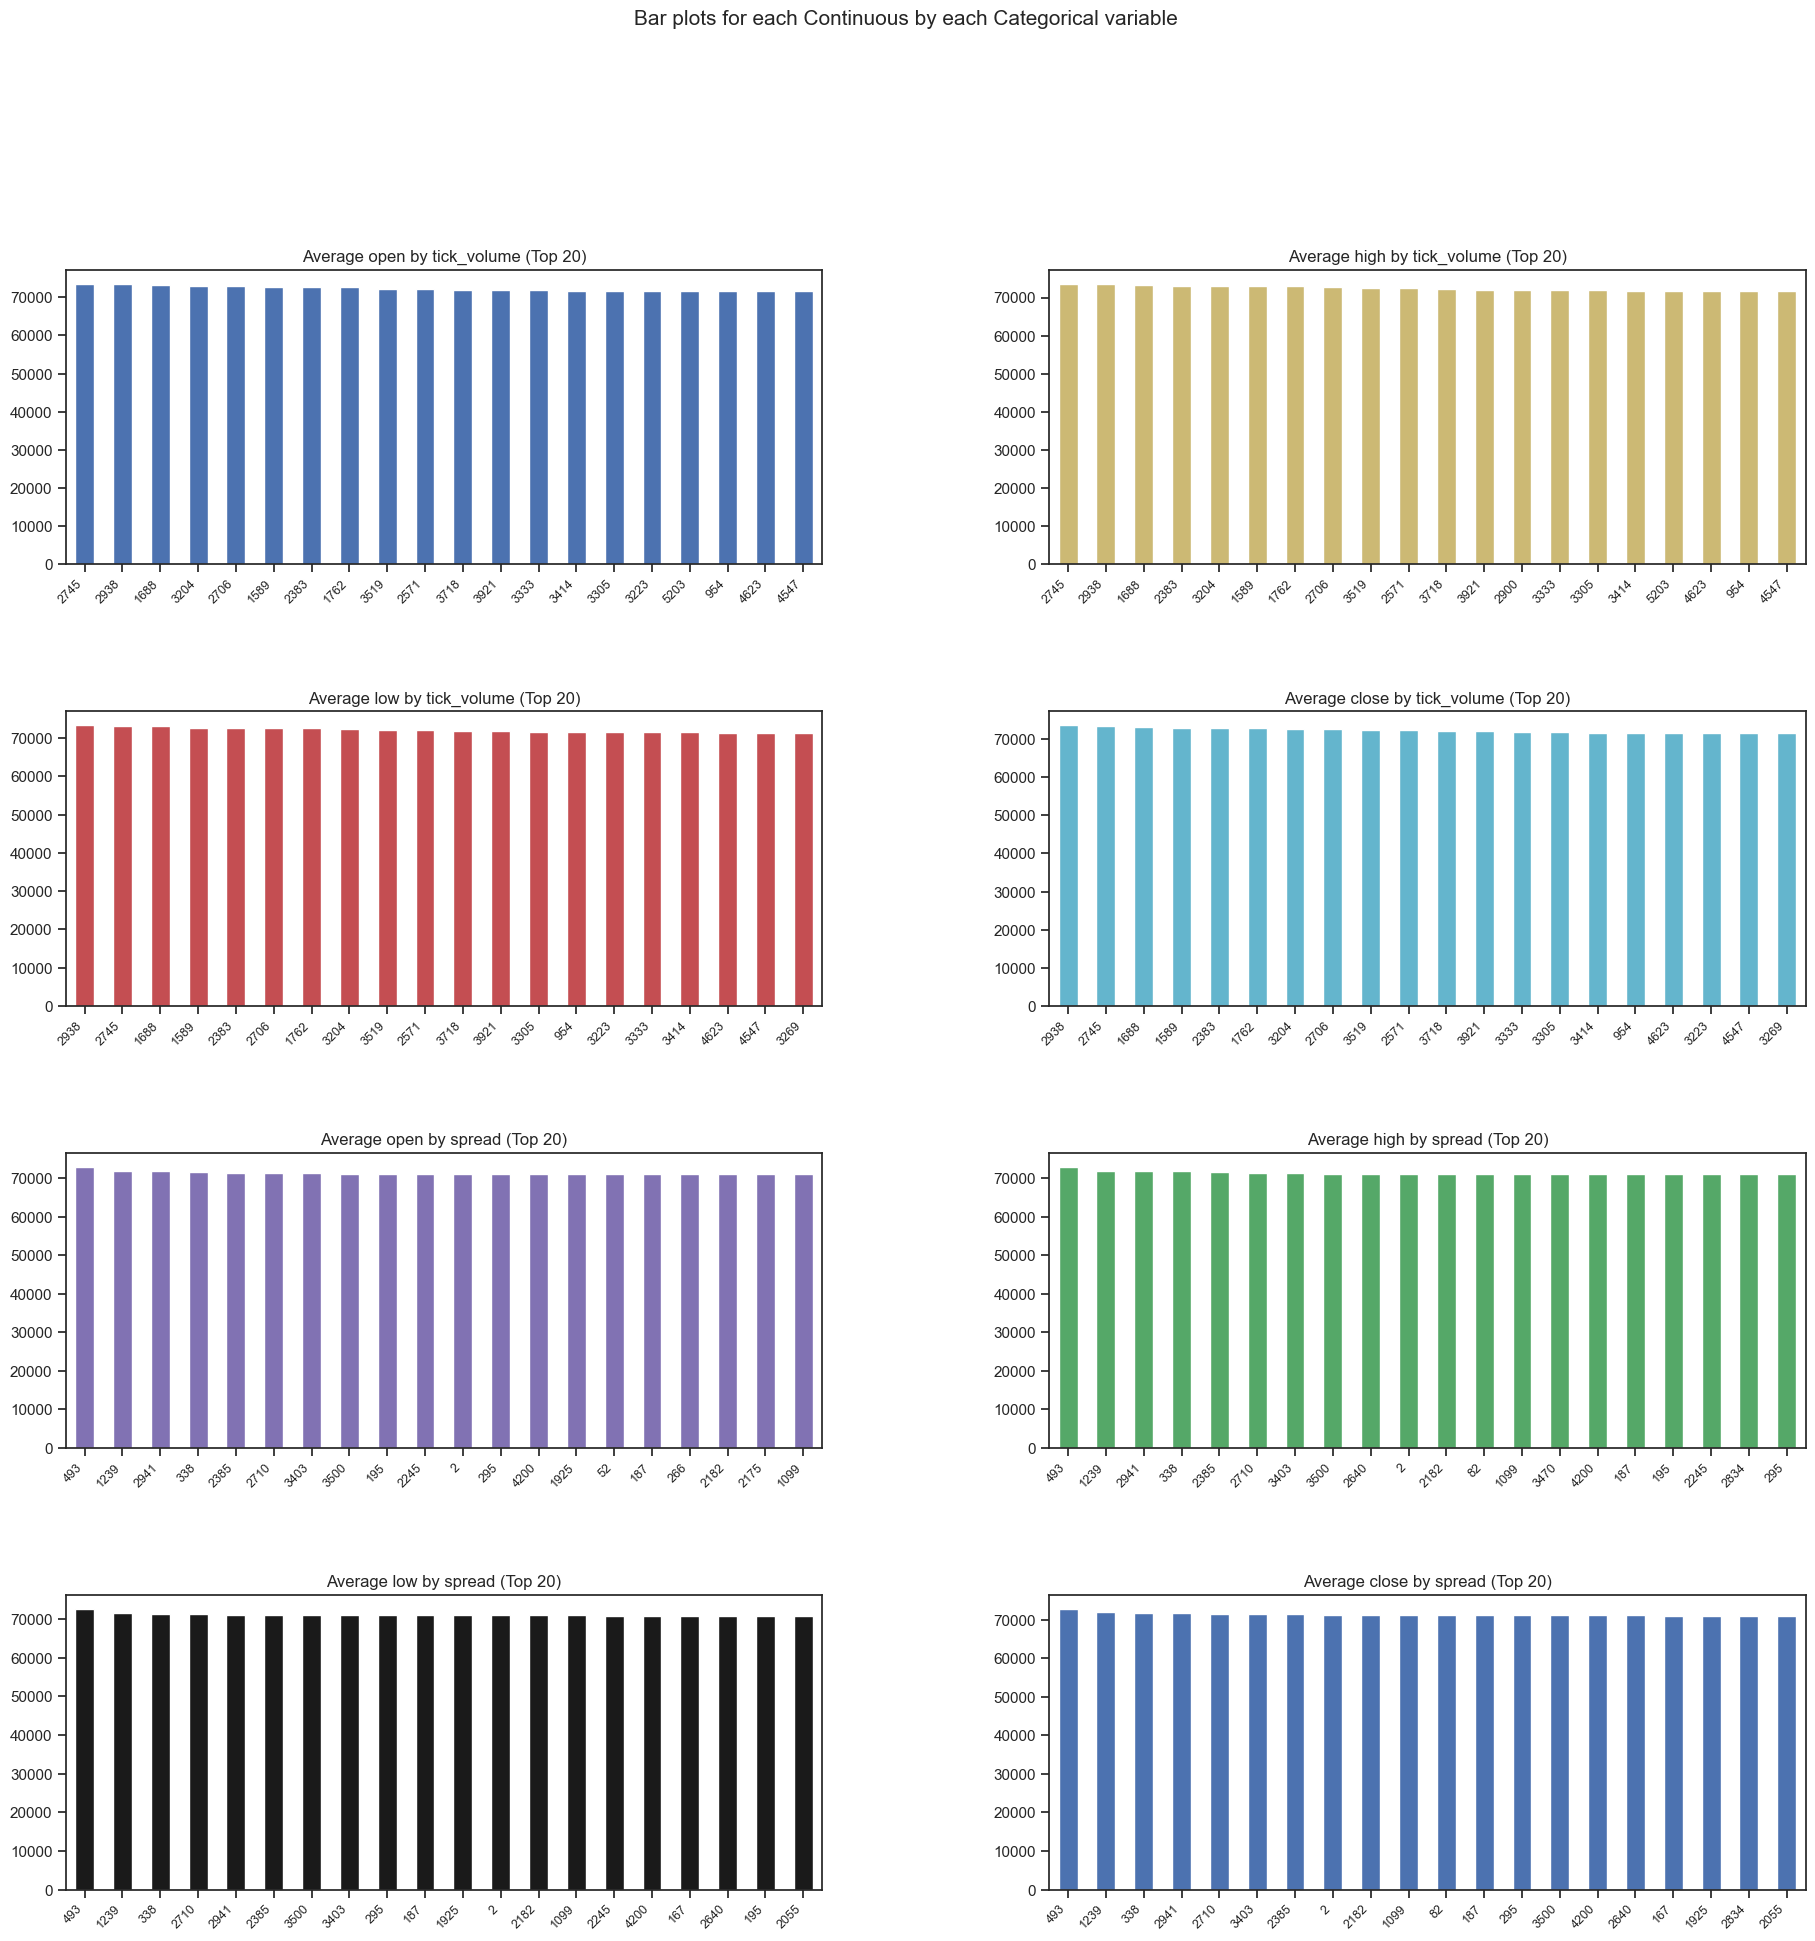

All Plots done
Time to run AutoViz = 10 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [2]:
dft = AV.AutoViz(
    'data_15.csv',
    sep=",",
    depVar="close",
    dfte=None,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="jpg",
    save_plot_dir=None
)

#### EDA for **30 minutes** interval timeframe

Shape of your Data Set loaded: (10000, 8)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  1
    7 Predictors classified...
        2 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['time', 'real_volume']

################ Regression problem ########

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
open,float64,0.000000,NA,37613.730000,73636.900000,No issue
high,float64,0.000000,NA,37652.120000,73843.750000,Column has a high correlation with ['open']. Consider dropping one of them.
low,float64,0.000000,NA,37469.050000,73406.670000,"Column has a high correlation with ['open', 'high']. Consider dropping one of them."
tick_volume,int64,0.000000,57,12.000000,13149.000000,Column has 34 outliers greater than upper bound (10672.62) or lower than lower bound(-2160.38). Cap them or remove them.
spread,int64,0.000000,16,0.000000,11049.000000,Column has 121 outliers greater than upper bound (1808.00) or lower than lower bound(-216.00). Cap them or remove them.
close,float64,0.000000,99,37617.720000,73639.900000,Target column


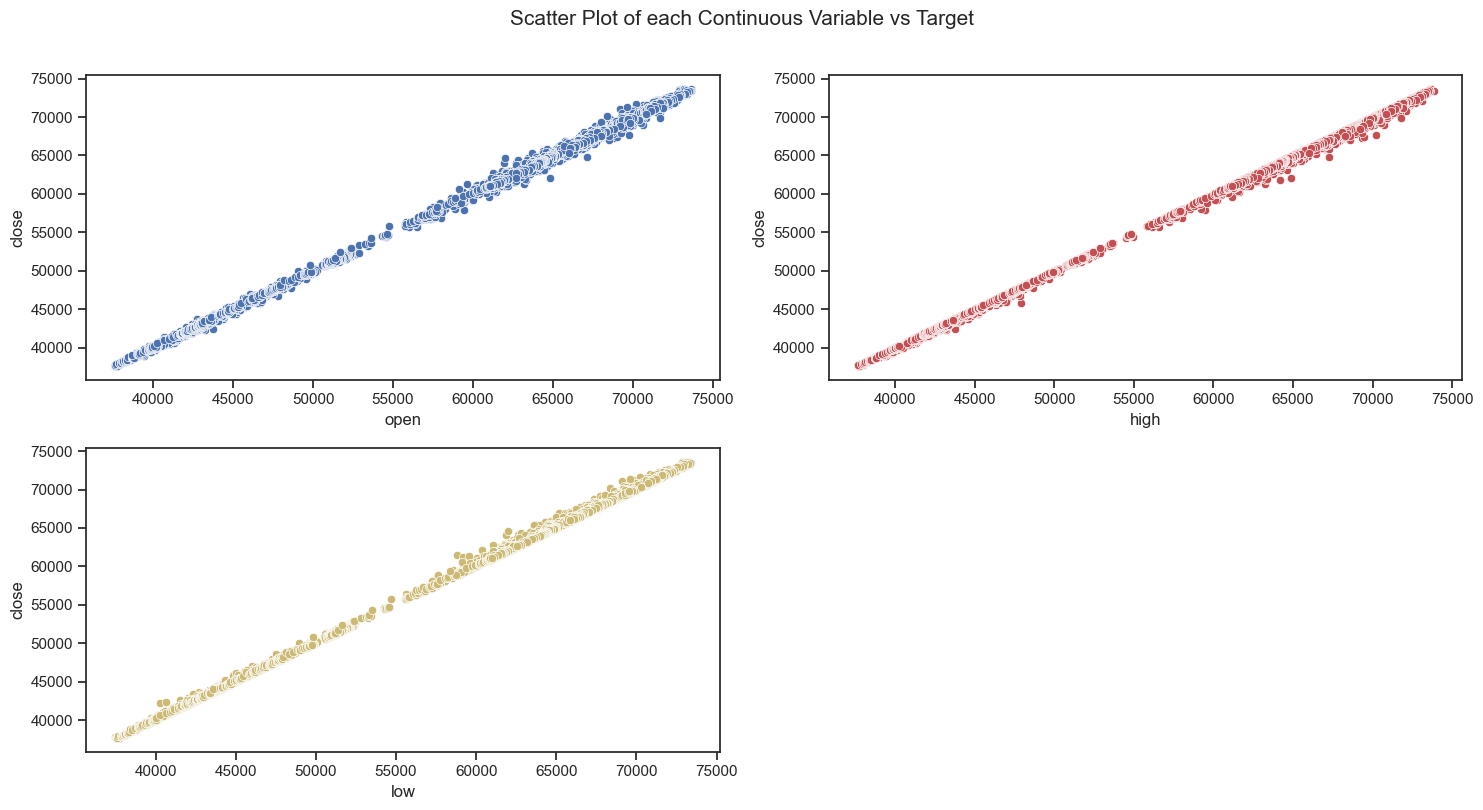

Number of All Scatter Plots = 6


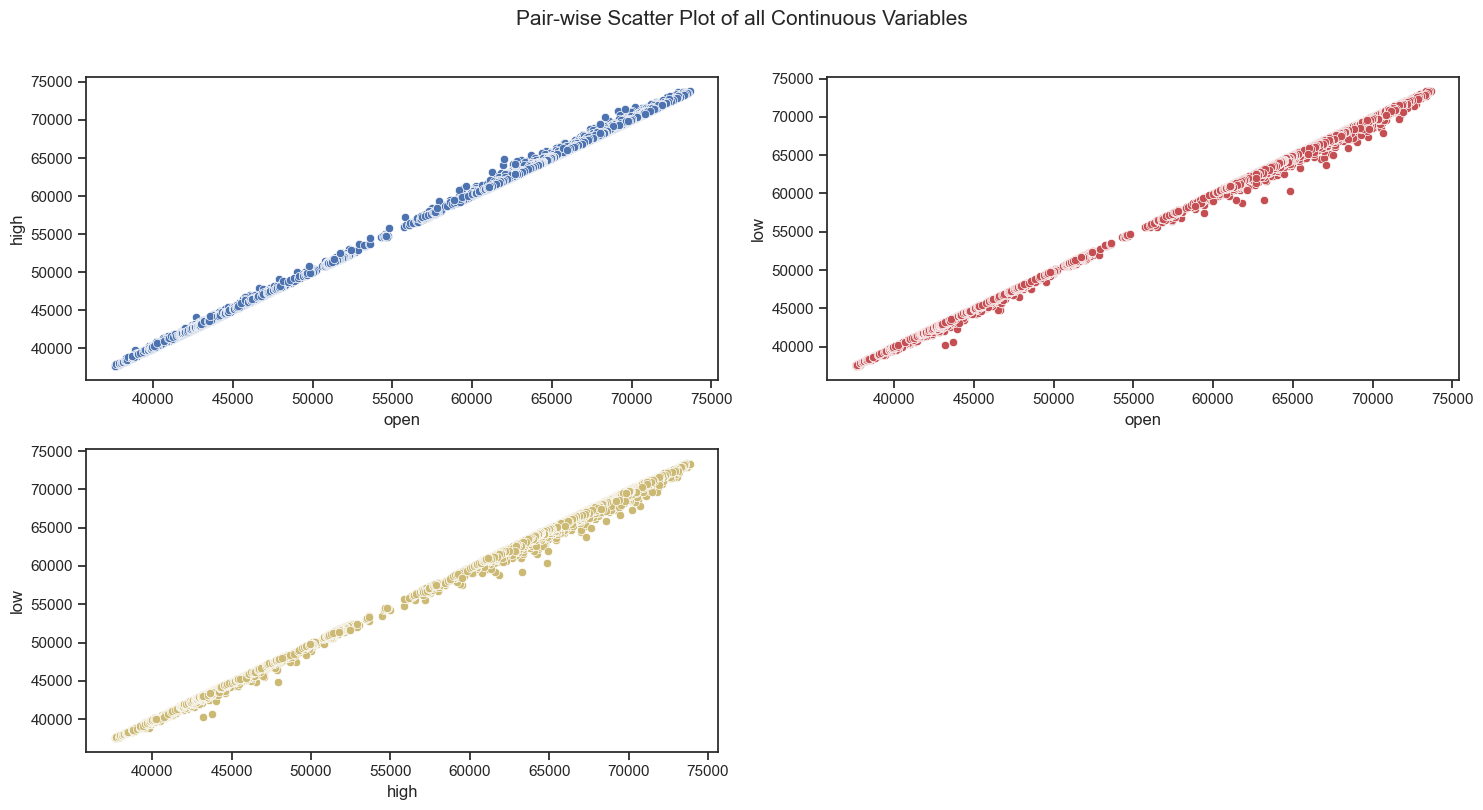

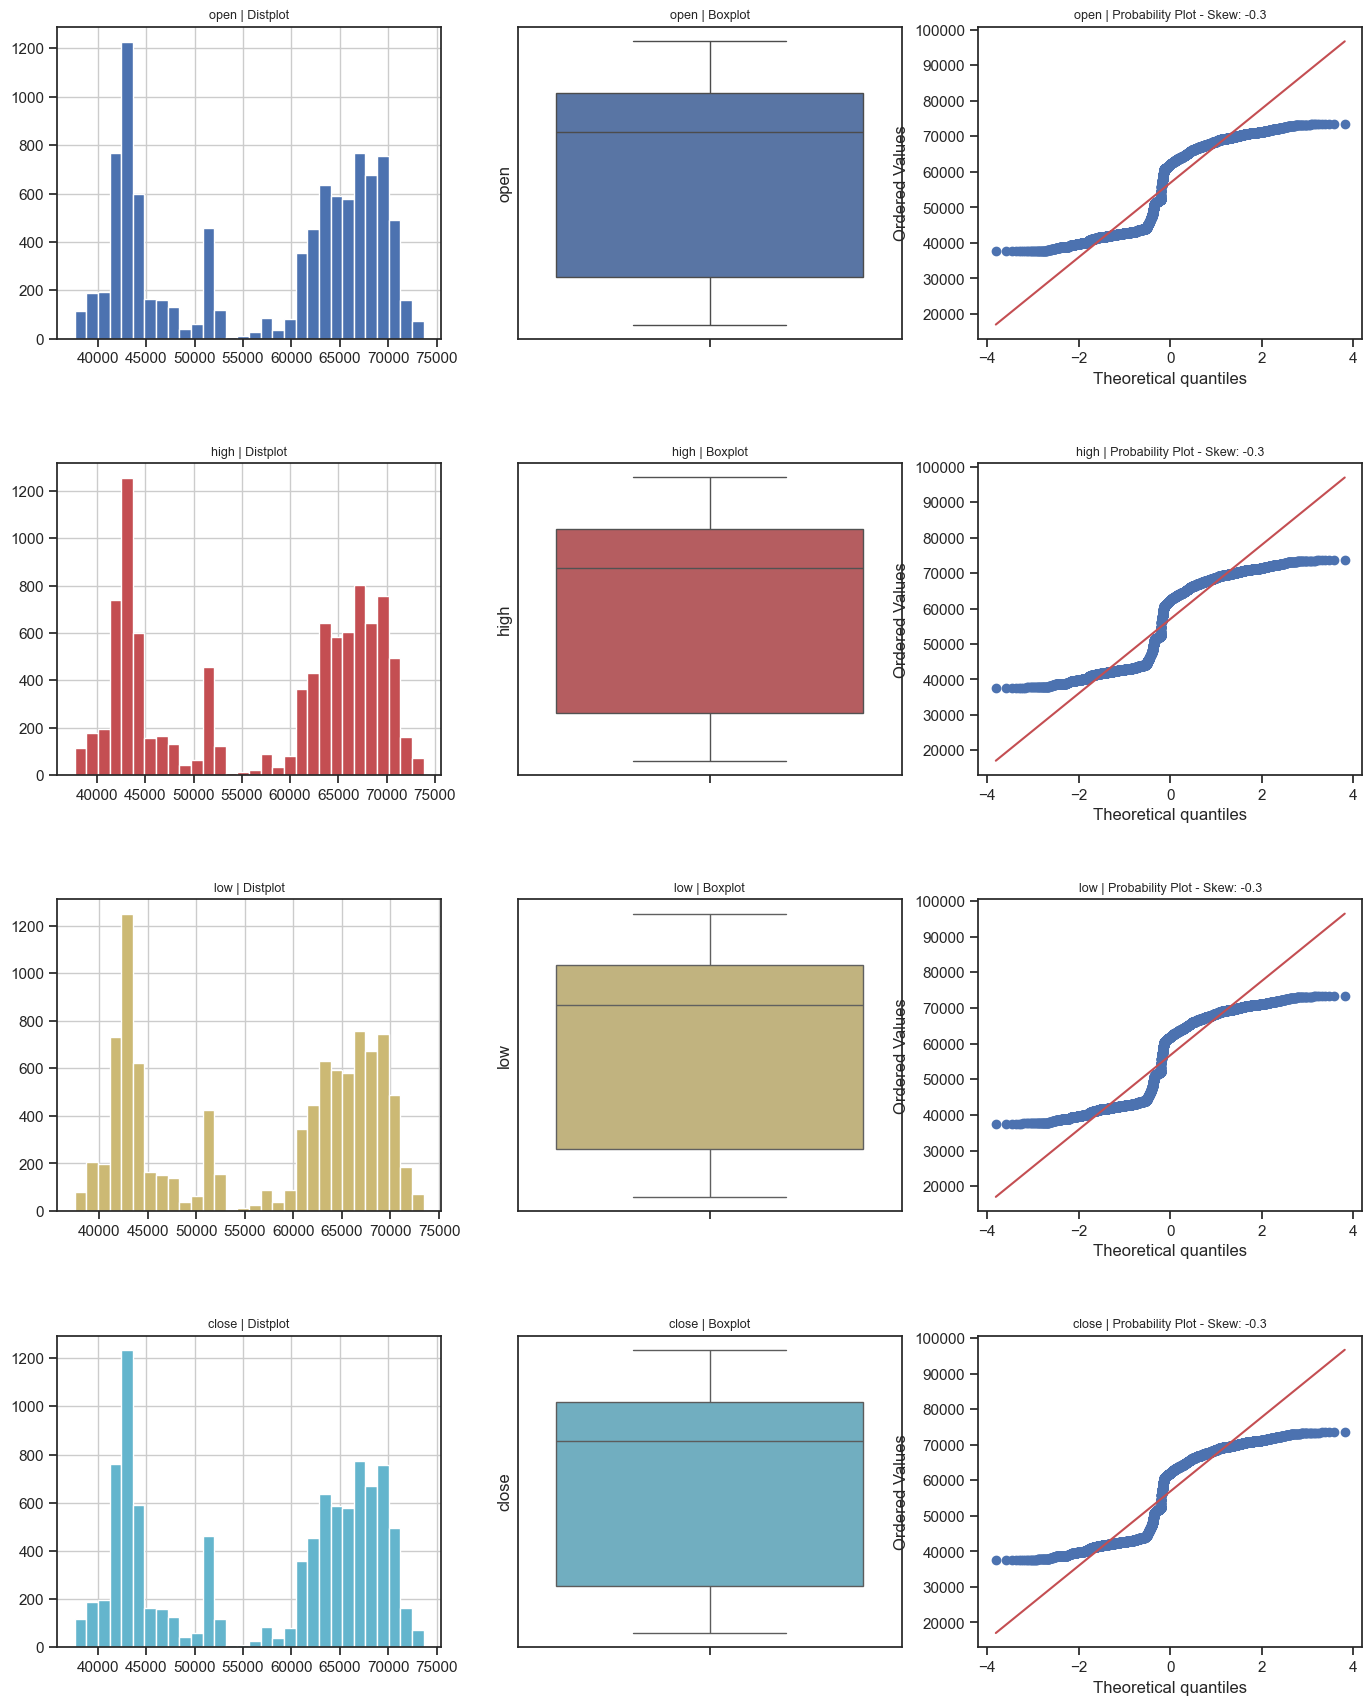

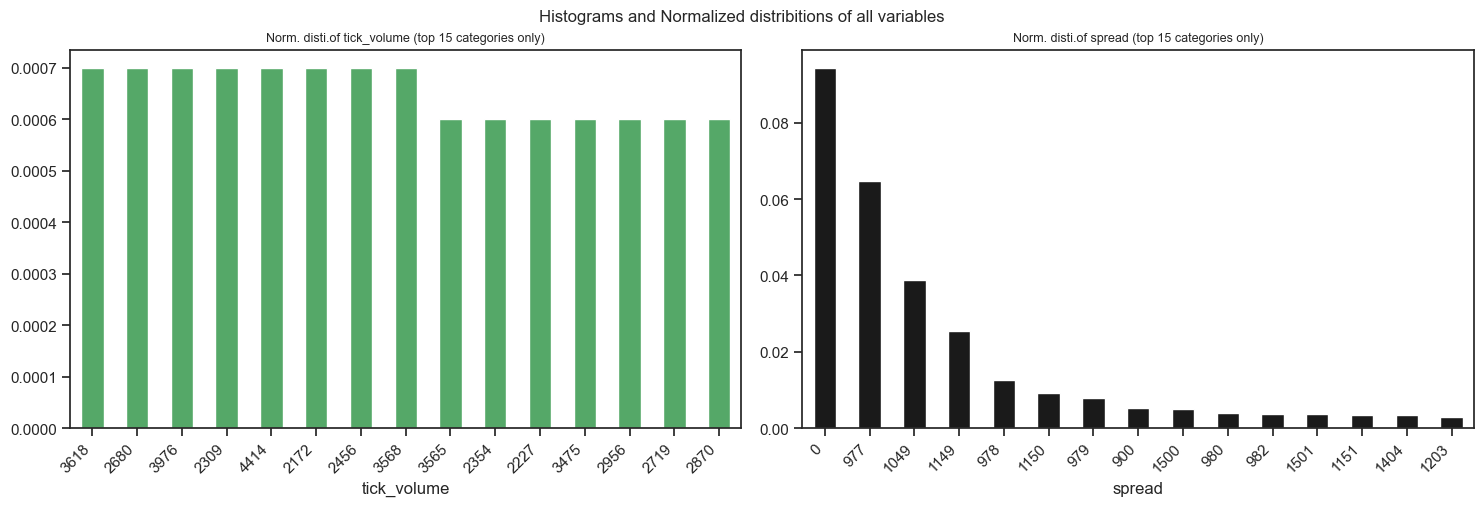

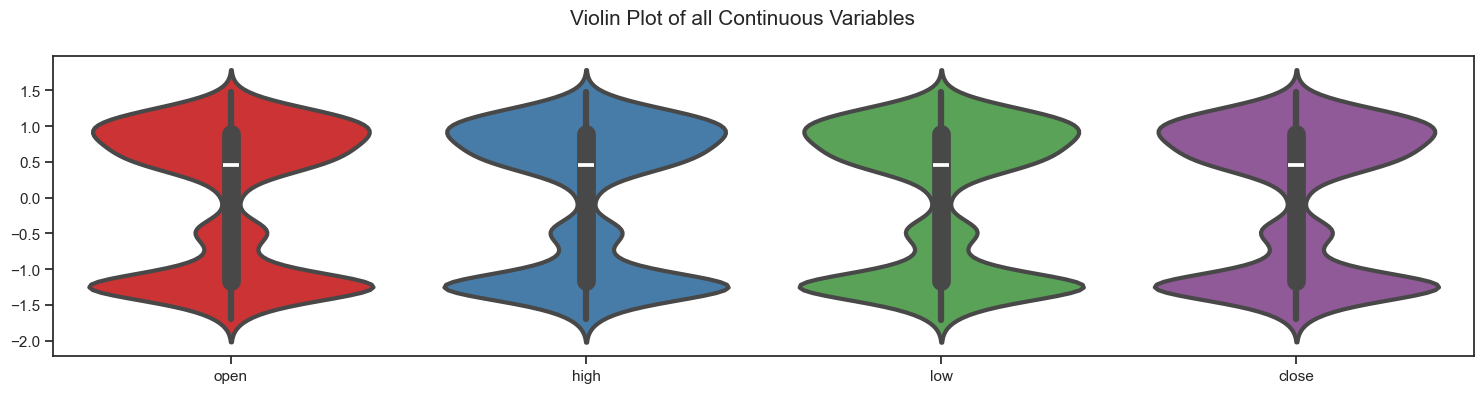

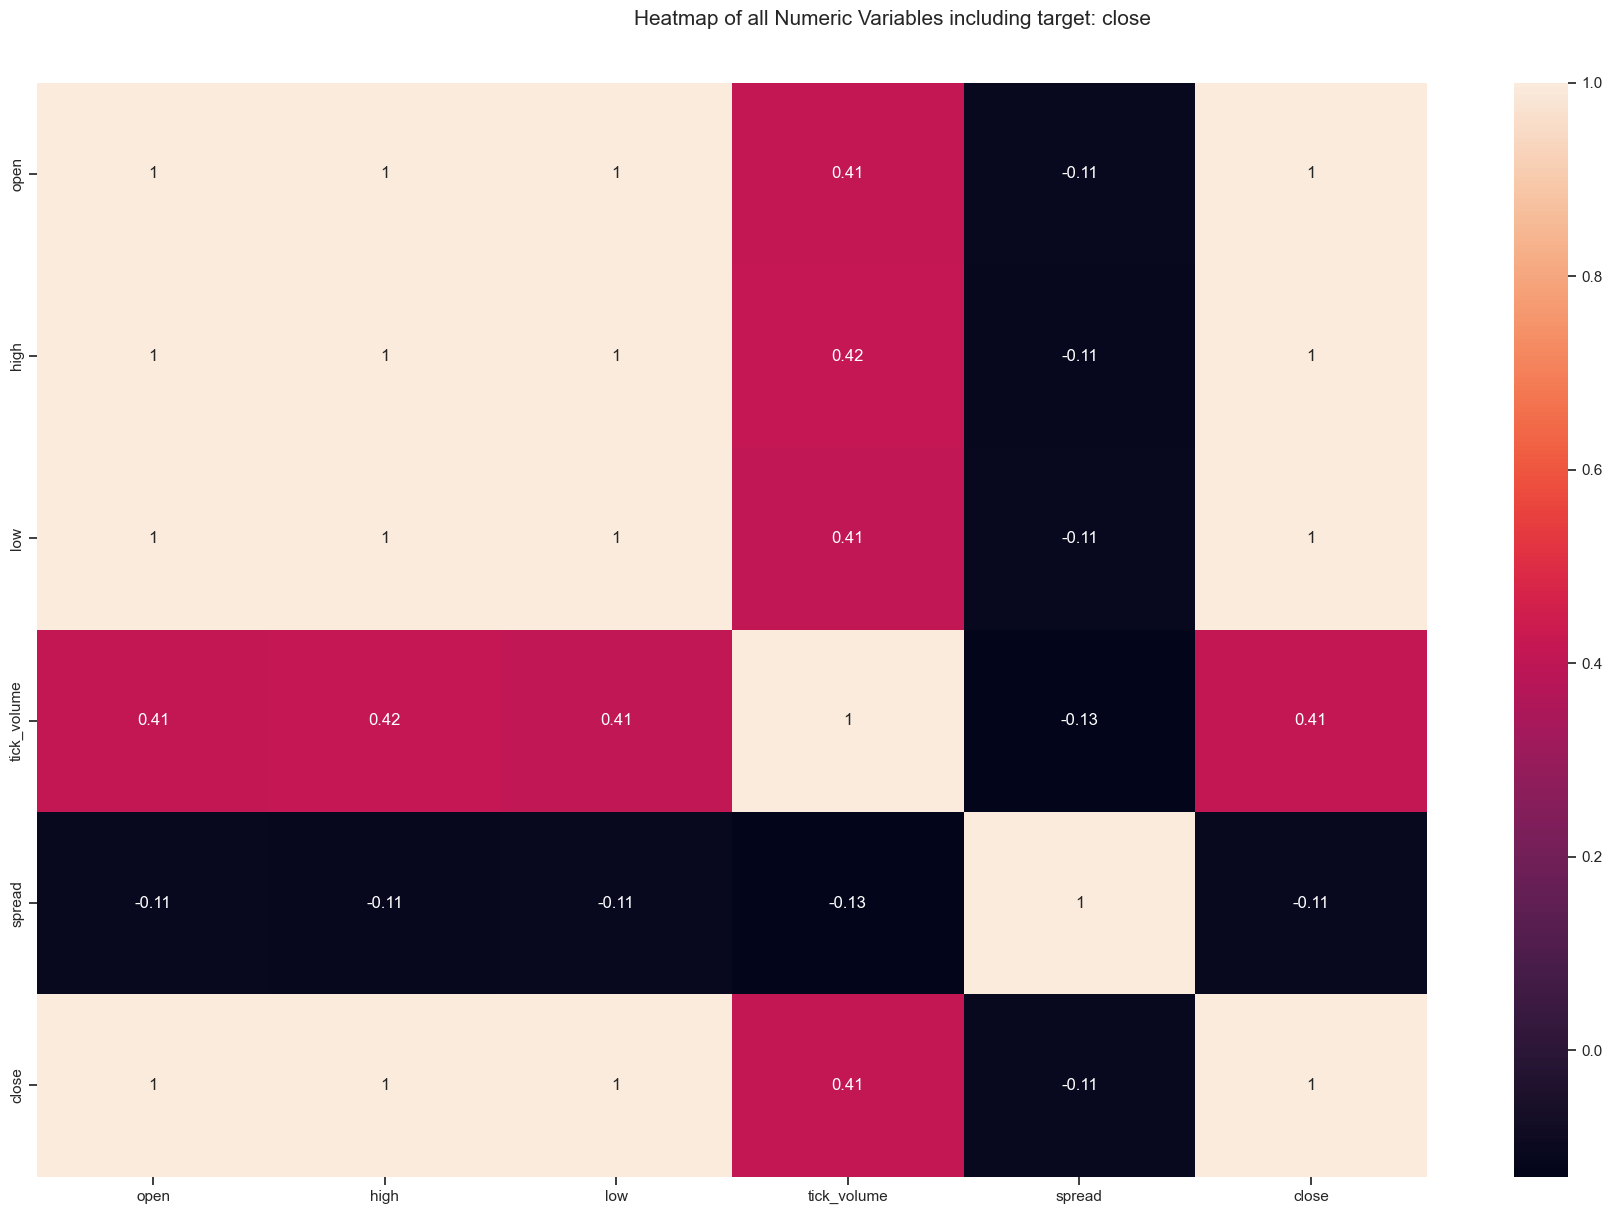

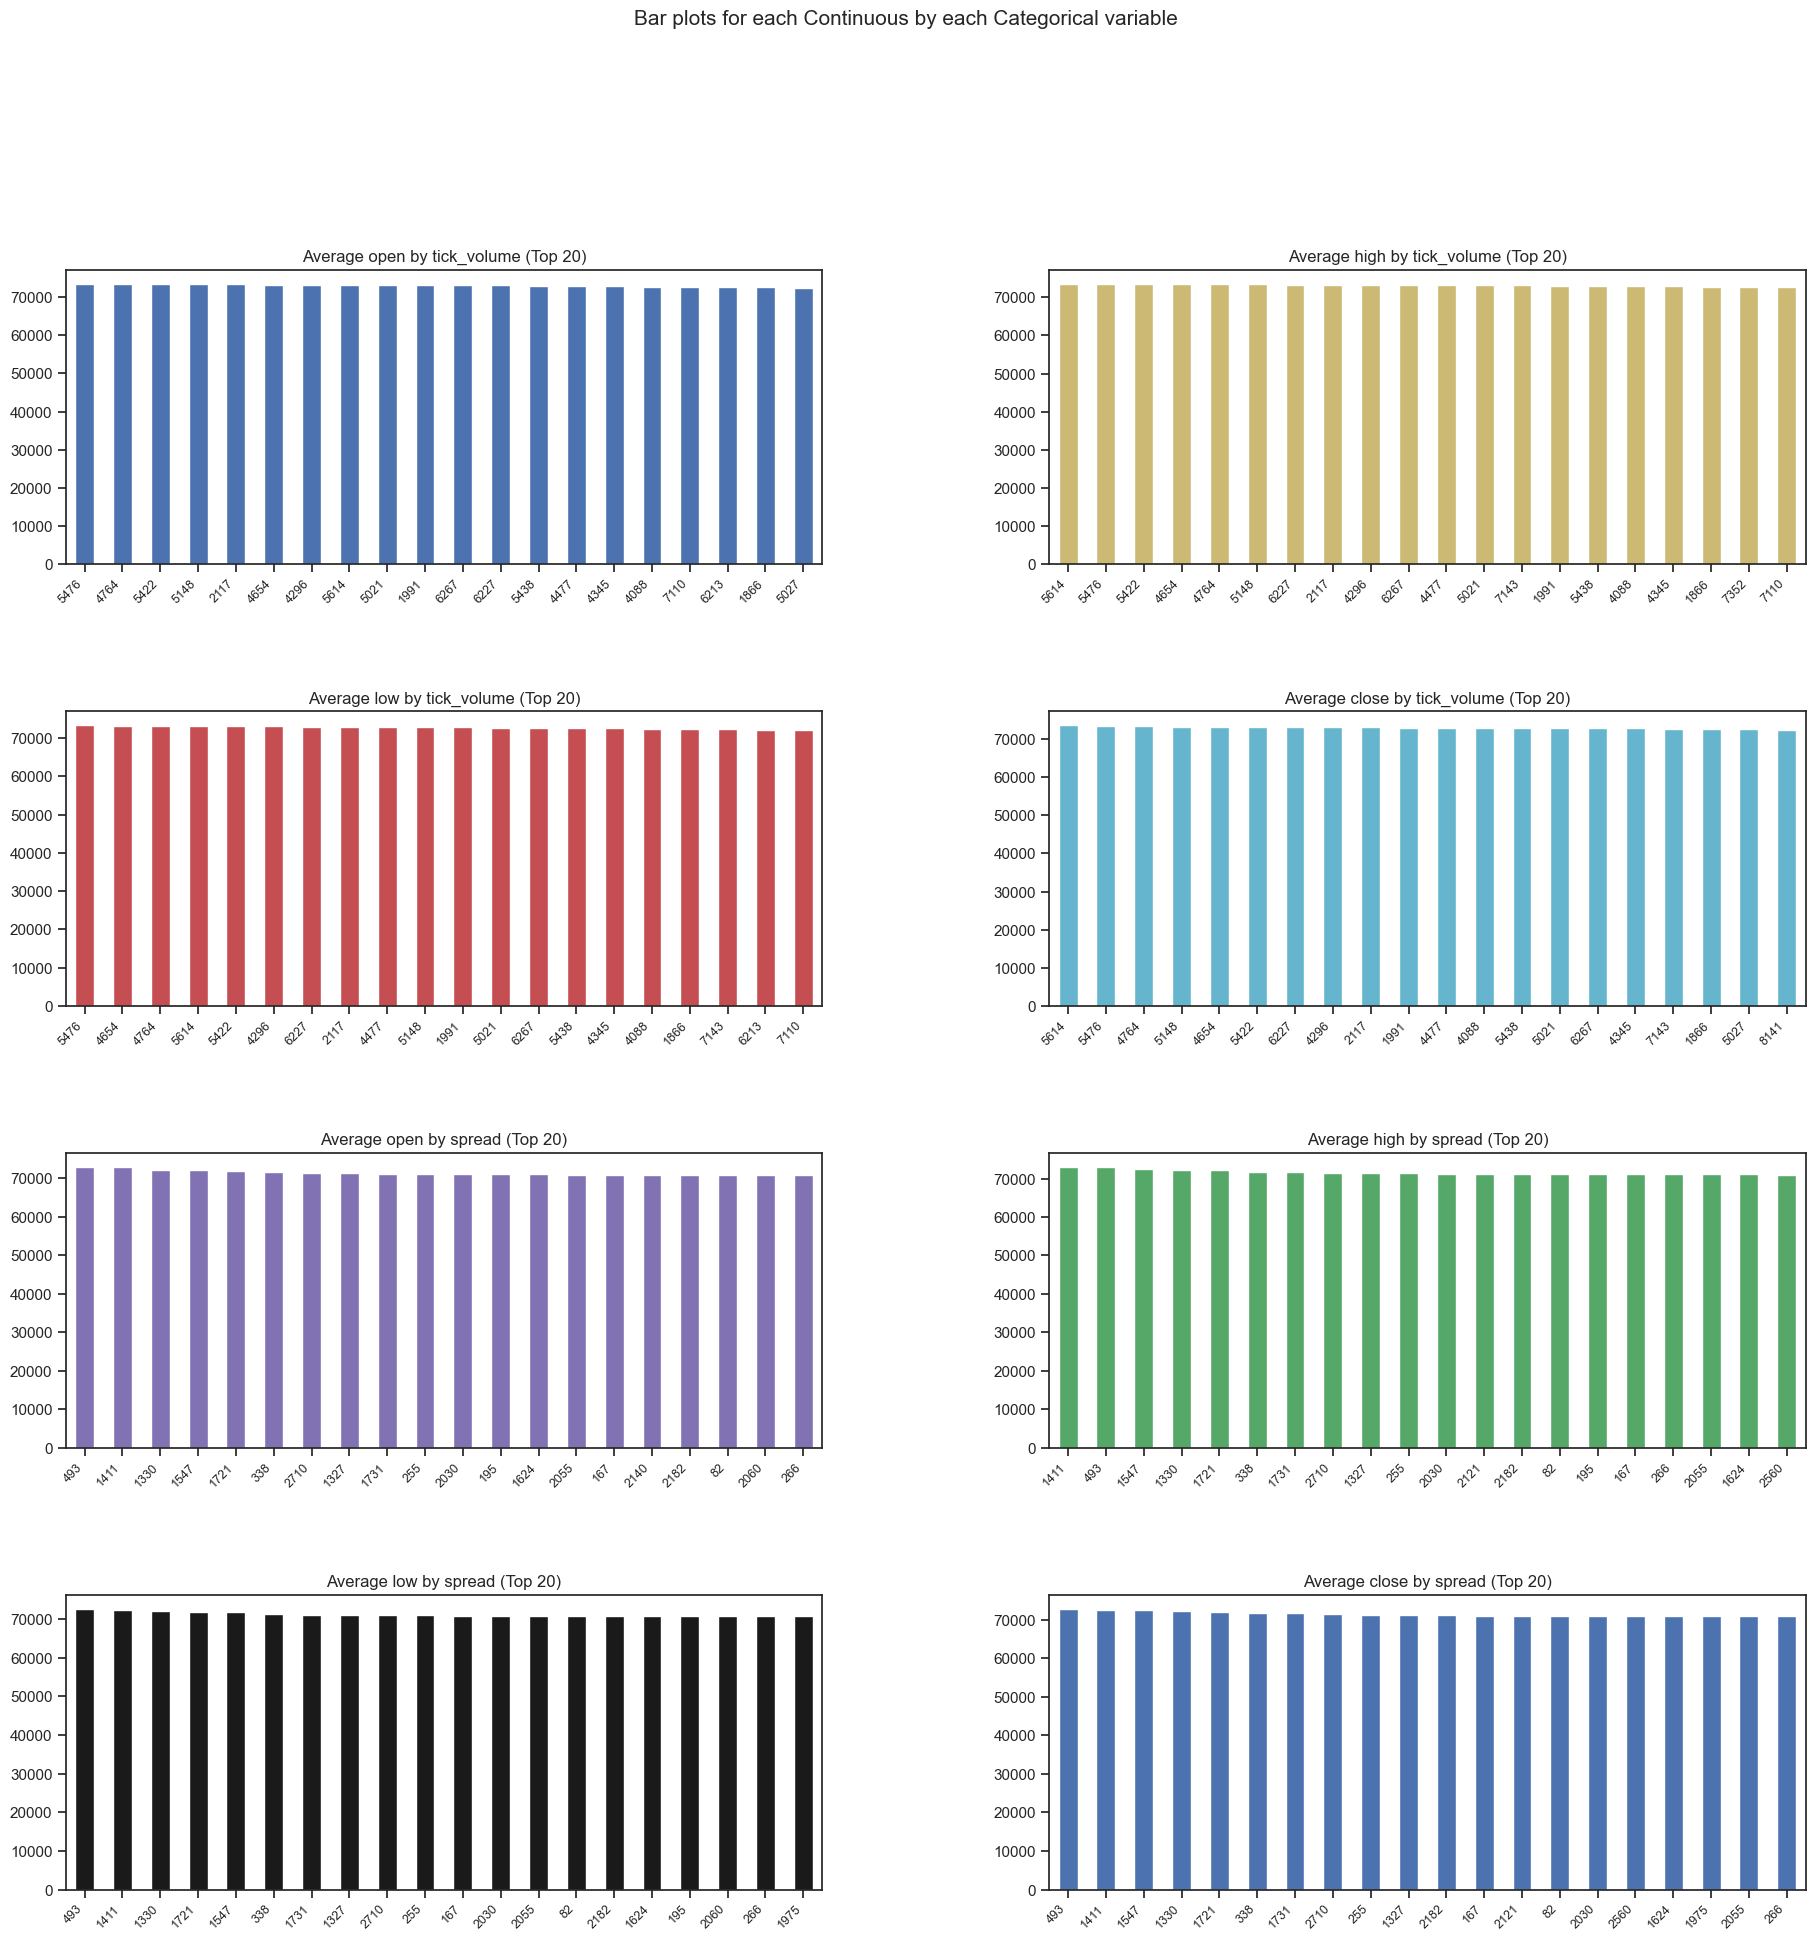

All Plots done
Time to run AutoViz = 8 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [3]:
dft = AV.AutoViz(
    'data_30.csv',
    sep=",",
    depVar="close",
    dfte=None,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="jpg",
    save_plot_dir=None
)

as we can see the data in time interval of **15 minutes** are more normally distributed also don't have outliers along with wider stable density of data. so the data is getting more stable insights in the 15 minutes timeframe interval. **Hence, we'll use 15 minutes timeframe to create LSTM model**.

### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping



### Getting Selected Timeframe Data

In [2]:
data = pd.read_csv('data_15.csv')
data

,time,open,high,low,close,tick_volume,spread,real_volume
0,2024-03-14 03:30:00,73157.97,73167.00,72893.14,72967.13,2450,823,0
1,2024-03-14 03:45:00,72956.82,73029.01,72794.36,72879.54,2571,979,0
2,2024-03-14 04:00:00,72878.68,72887.61,72655.49,72740.79,2706,493,0
3,2024-03-14 04:15:00,72740.79,72844.75,72713.29,72778.75,1740,864,0
4,2024-03-14 04:30:00,72778.75,72845.25,72537.16,72764.71,2022,826,0
...,...,...,...,...,...,...,...,...
9995,2024-06-27 05:30:00,60977.86,61050.61,60868.25,60877.06,1747,530,0
9996,2024-06-27 05:45:00,60877.06,60976.71,60875.34,60975.02,1416,575,0
9997,2024-06-27 06:00:00,60975.02,60997.85,60879.35,60984.05,1780,901,0
9998,2024-06-27 06:15:00,60984.05,61202.30,60975.33,61075.76,2154,0,0


### Data Preprocessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         10000 non-null  object 
 1   open         10000 non-null  float64
 2   high         10000 non-null  float64
 3   low          10000 non-null  float64
 4   close        10000 non-null  float64
 5   tick_volume  10000 non-null  int64  
 6   spread       10000 non-null  int64  
 7   real_volume  10000 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 625.1+ KB


In [3]:
# Converting from object to datetime
data['time'] = pd.to_datetime(data['time'])
print(data['time'].dtype)
data

datetime64[ns]


,time,open,high,low,close,tick_volume,spread,real_volume
0,2024-03-14 03:30:00,73157.97,73167.00,72893.14,72967.13,2450,823,0
1,2024-03-14 03:45:00,72956.82,73029.01,72794.36,72879.54,2571,979,0
2,2024-03-14 04:00:00,72878.68,72887.61,72655.49,72740.79,2706,493,0
3,2024-03-14 04:15:00,72740.79,72844.75,72713.29,72778.75,1740,864,0
4,2024-03-14 04:30:00,72778.75,72845.25,72537.16,72764.71,2022,826,0
...,...,...,...,...,...,...,...,...
9995,2024-06-27 05:30:00,60977.86,61050.61,60868.25,60877.06,1747,530,0
9996,2024-06-27 05:45:00,60877.06,60976.71,60875.34,60975.02,1416,575,0
9997,2024-06-27 06:00:00,60975.02,60997.85,60879.35,60984.05,1780,901,0
9998,2024-06-27 06:15:00,60984.05,61202.30,60975.33,61075.76,2154,0,0


In [7]:
# checking null values
data.isnull().sum()

time           0
open           0
high           0
low            0
close          0
tick_volume    0
spread         0
real_volume    0
dtype: int64

In [9]:
# checking duplicate values
data.duplicated().sum()

0

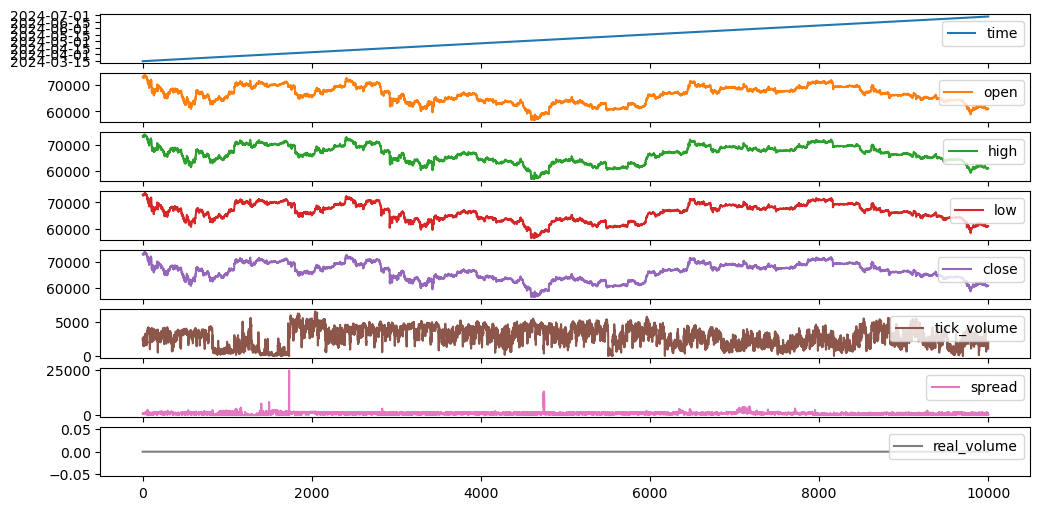

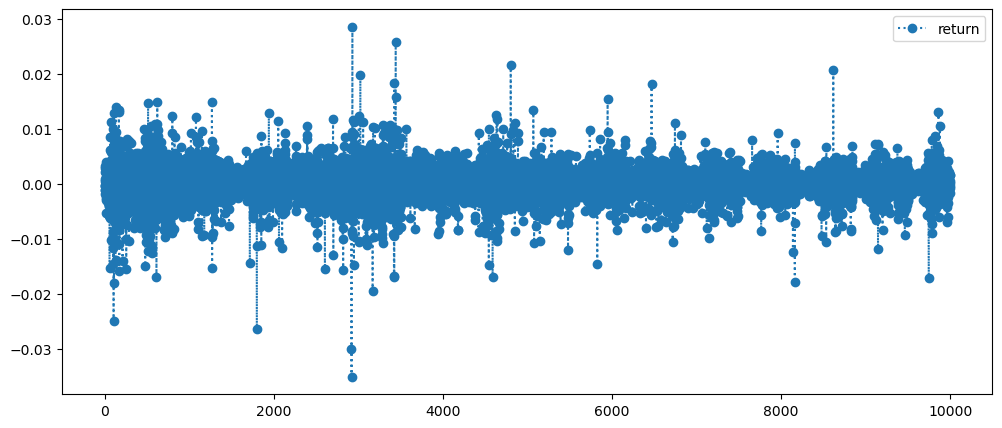

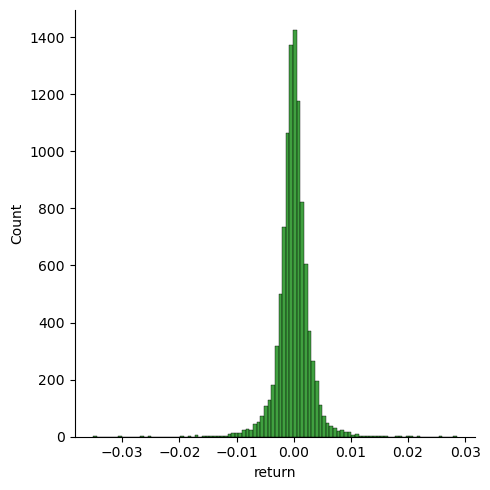

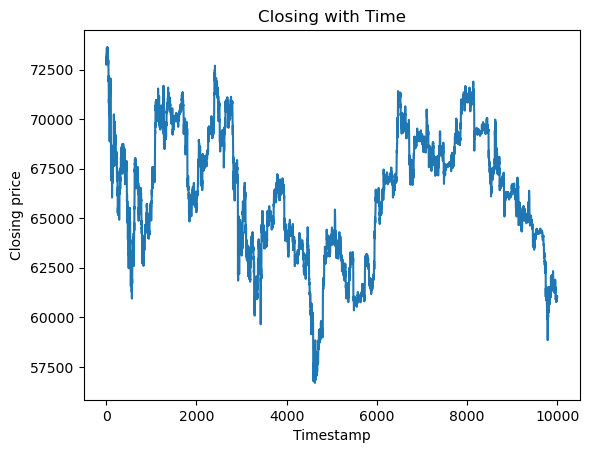

In [4]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()


data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()


data['return'] = data['close'].pct_change()
# plot the daily return percentage
data['return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['return'].dropna(),bins=100,color='green')
plt.show()

plt.plot(data['close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
plt.title('Closing with Time')
plt.show()

In [5]:
data['log_return'] = np.log(1 + data['return'])
data

,time,open,high,low,close,tick_volume,spread,real_volume,return,log_return
0,2024-03-14 03:30:00,73157.97,73167.00,72893.14,72967.13,2450,823,0,NaN,NaN
1,2024-03-14 03:45:00,72956.82,73029.01,72794.36,72879.54,2571,979,0,-0.001200,-0.001201
2,2024-03-14 04:00:00,72878.68,72887.61,72655.49,72740.79,2706,493,0,-0.001904,-0.001906
3,2024-03-14 04:15:00,72740.79,72844.75,72713.29,72778.75,1740,864,0,0.000522,0.000522
4,2024-03-14 04:30:00,72778.75,72845.25,72537.16,72764.71,2022,826,0,-0.000193,-0.000193
...,...,...,...,...,...,...,...,...,...,...
9995,2024-06-27 05:30:00,60977.86,61050.61,60868.25,60877.06,1747,530,0,-0.001651,-0.001652
9996,2024-06-27 05:45:00,60877.06,60976.71,60875.34,60975.02,1416,575,0,0.001609,0.001608
9997,2024-06-27 06:00:00,60975.02,60997.85,60879.35,60984.05,1780,901,0,0.000148,0.000148
9998,2024-06-27 06:15:00,60984.05,61202.30,60975.33,61075.76,2154,0,0,0.001504,0.001503


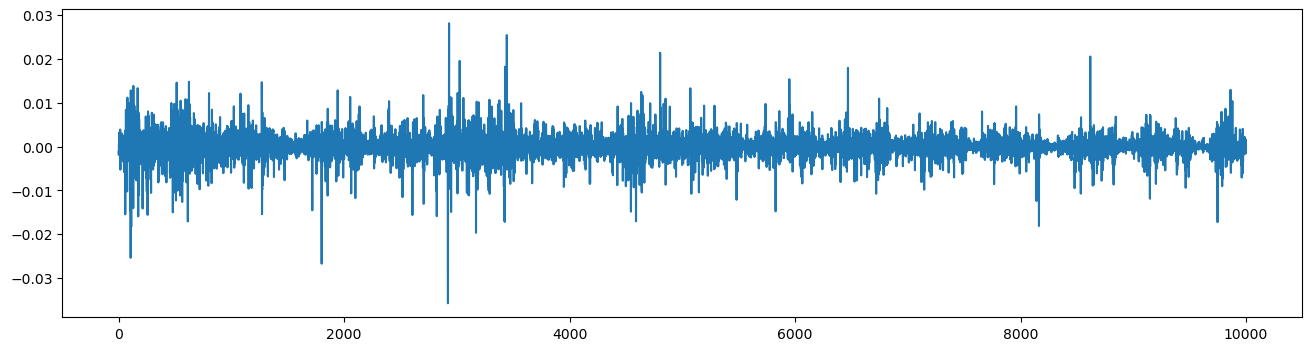

In [10]:
plt.figure(1, figsize=(16, 4))
plt.plot(data['log_return'])

In [6]:
data.dropna(inplace=True)
X = data[['close', 'log_return', 'open']].values
X

array([[ 7.28795400e+04, -1.20112459e-03,  7.29568200e+04],
       [ 7.27407900e+04, -1.90564109e-03,  7.28786800e+04],
       [ 7.27787500e+04,  5.21716889e-04,  7.27407900e+04],
       ...,
       [ 6.09840500e+04,  1.48082468e-04,  6.09750200e+04],
       [ 6.10757600e+04,  1.50270621e-03,  6.09840500e+04],
       [ 6.10477600e+04, -4.58552136e-04,  6.10754600e+04]])

In [7]:
scaler = MinMaxScaler(feature_range=(0,1)).fit(X)
X_scaled = scaler.transform(X)

In [8]:
y_scaled = [x[0] for x in X_scaled]


In [9]:
X_scaled[:7], y_scaled[:7]

(array([[0.95514164, 0.5409179 , 0.95987667],
        [0.94695591, 0.52989307, 0.95526657],
        [0.94919541, 0.56787828, 0.94713134],
        [0.9483671 , 0.55669489, 0.9493709 ],
        [0.96039171, 0.60348633, 0.94854788],
        [0.95844071, 0.55262027, 0.96056754],
        [0.9724647 , 0.61063338, 0.95851559]]),
 [0.9551416381124991,
  0.9469559133086021,
  0.9491954096225195,
  0.9483671027666869,
  0.9603917112678051,
  0.958440706444275,
  0.9724646966650621])

### Train Test Split

In [10]:
split = int(len(X_scaled) * 0.85)
print(split)

8499


In [11]:
X_train = X_scaled[:split]
X_test = X_scaled[split: len(X_scaled)]
y_train = y_scaled[:split]
y_test = y_scaled[split: len(y_scaled)]

In [12]:
assert len (X_train) == len(y_train)
assert len (X_test) == len(y_test)

In [13]:
# set the timestep for training
timestep = 5
X_train_new = []
y_train_new = []
X_test_new = []
y_test_new = []

for step in range(timestep, len(X_train)):
    X_train_new.append(X_train[step - timestep : step, : X_train.shape[1]])
    y_train_new.append(y_train[step]) # predict next record

for step in range(timestep, len(X_test)):
    X_test_new.append(X_test[step - timestep : step, : X_test.shape[1]])
    y_test_new.append(y_test[step]) # predict next record

In [16]:
X_train_new[0]

array([[0.95514164, 0.5409179 , 0.95987667],
       [0.94695591, 0.52989307, 0.95526657],
       [0.94919541, 0.56787828, 0.94713134],
       [0.9483671 , 0.55669489, 0.9493709 ],
       [0.96039171, 0.60348633, 0.94854788]])

In [17]:
y_train_new[0]

0.958440706444275

In [14]:
X_train_new, y_train_new = (np.array(X_train_new), np.array(y_train_new))
X_train_new = np.reshape(X_train_new, (X_train_new.shape[0], X_train_new.shape[1], X_train_new.shape[2]))

X_test_new, y_test_new = (np.array(X_test_new), np.array(y_test_new))
X_test_new = np.reshape(X_test_new, (X_test_new.shape[0], X_test_new.shape[1], X_test_new.shape[2]))

In [19]:
X_train_new.shape, y_train_new.shape,X_test_new.shape, y_test_new.shape

((8494, 5, 3), (8494,), (1495, 5, 3), (1495,))

## LSTM Model Developement

### Model Training

In [16]:
model = Sequential()
model.add(LSTM(50, input_shape = (X_train_new.shape[1], X_train_new.shape[2]), activation= 'relu', return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(LSTM(60, activation= 'tanh', return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(80, activation= 'tanh', return_sequences= True))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(LSTM(120, activation = 'tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation= 'linear'))

g:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.compile(loss = 'mse', optimizer= 'adam', metrics=['mse', 'mae', 'accuracy'])

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

history = model.fit(X_train_new, y_train_new, epochs = 100, validation_data=(X_test_new, y_test_new), batch_size=32, verbose=1, shuffle=True, callbacks=[early_stopping])

Epoch 1/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 4.3440e-04 - loss: 1.7828 - mae: 1.0352 - mse: 1.7828 - val_accuracy: 0.0000e+00 - val_loss: 0.0213 - val_mae: 0.1116 - val_mse: 0.0213
Epoch 2/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 3.7970e-04 - loss: 0.2971 - mae: 0.4242 - mse: 0.2971 - val_accuracy: 0.0000e+00 - val_loss: 0.0024 - val_mae: 0.0436 - val_mse: 0.0024
Epoch 3/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 4.0179e-04 - loss: 0.0641 - mae: 0.2007 - mse: 0.0641 - val_accuracy: 0.0000e+00 - val_loss: 0.0029 - val_mae: 0.0488 - val_mse: 0.0029
Epoch 4/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 1.3723e-04 - loss: 0.0218 - mae: 0.1167 - mse: 0.0218 - val_accuracy: 0.0000e+00 - val_loss: 0.0023 - val_mae: 0.0427 - val_mse: 0.0023
Epoch 5/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 3.0172e-04 - loss: 0.0102 - mae: 0.0799 - mse: 0.0102 - val_accuracy: 0.0000e+00 - val_loss: 7.4761e-04 - val_mae: 0.0208 - 

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5, 50)          │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 5, 50)          │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 5, 60)          │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 5, 60)          │           240 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 60)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 5, 80)          │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 5, 80)          │           320 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 80)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 120)            │           480 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 539,965 (2.06 MB)

 Trainable params: 179,781 (702.27 KB)

 Non-trainable params: 620 (2.42 KB)

 Optimizer params: 359,564 (1.37 MB)

### Performance Metrics

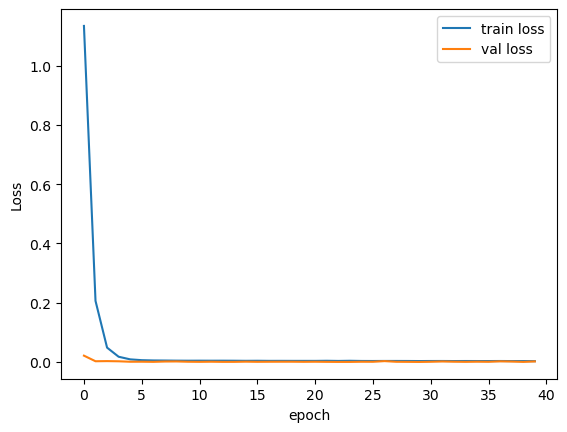

In [19]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label= 'val loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()

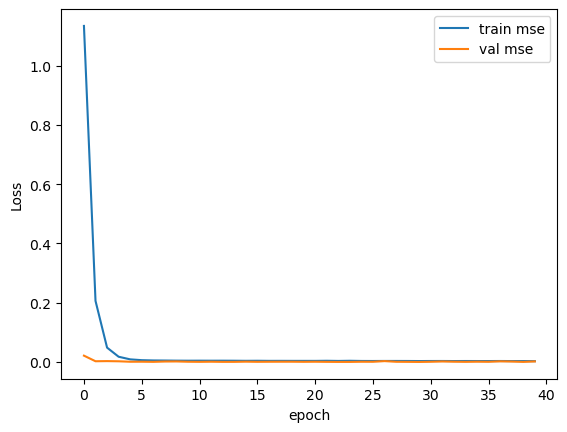

In [20]:
plt.plot(history.history['mse'], label = 'train mse')
plt.plot(history.history['val_mse'], label= 'val mse')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()

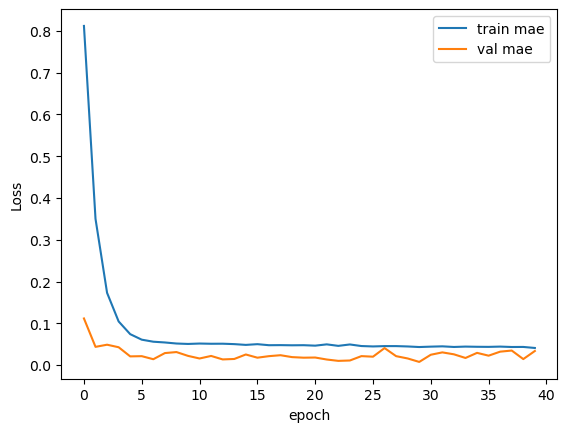

In [22]:
plt.plot(history.history['mae'], label = 'train mae')
plt.plot(history.history['val_mae'], label= 'val mae')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()

In [23]:
model.evaluate(X_test_new, y_test_new)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 1.7587e-04 - mae: 0.0085 - mse: 1.7587e-04


[0.0001343942276434973, 0.0001343942276434973, 0.007563691586256027, 0.0]

In [24]:
# Make predictions
train_predict = model.predict(X_train_new)
test_predict = model.predict(X_test_new)

# Calculate R-squared
r2_train = r2_score(y_train_new, train_predict)
r2_test = r2_score(y_test_new, test_predict)

print(f"R-squared Train: {r2_train}")
print(f"R-squared Test: {r2_test}")


266/266 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
R-squared Train: 0.9898355344196585
R-squared Test: 0.9915768948955443


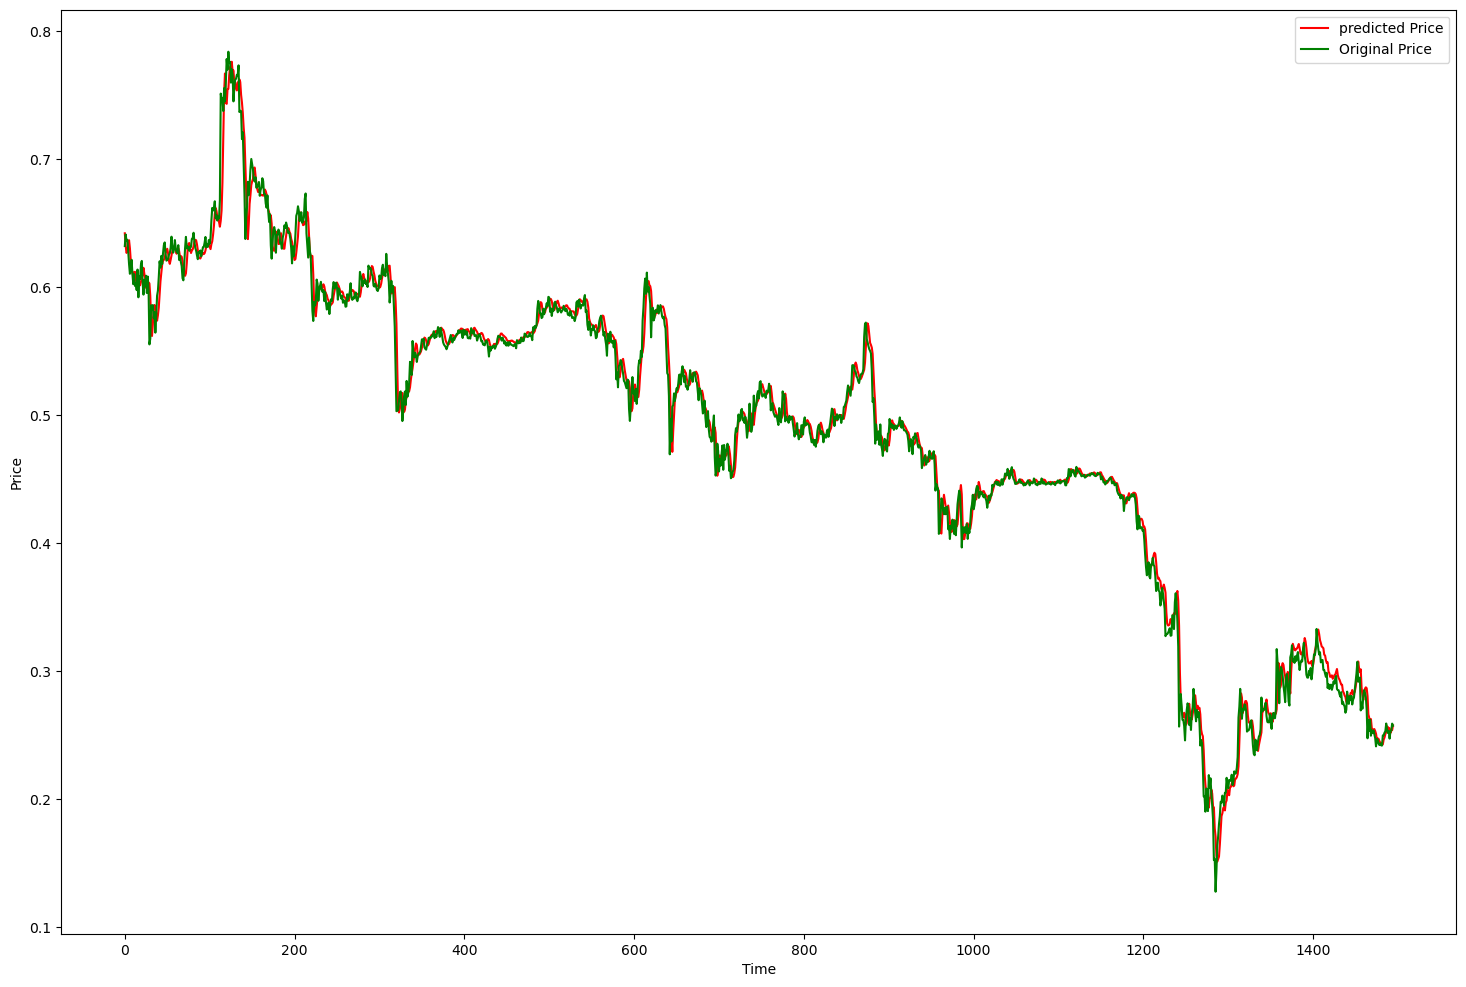

In [25]:
plt.figure(figsize=(18,12))
plt.plot(test_predict, 'r', label = 'predicted Price')
plt.plot(y_test_new, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

### Save the Trained Model

In [30]:
model.save('lstm_model.keras')